In [102]:
 import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [103]:
train=pd.read_csv('data.csv')

In [104]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [105]:
#train

In [106]:
year= train["Year"]

In [107]:
manual=train[train["Transmission Type"]=="MANUAL"]
manual=manual["Transmission Type"]
manual.describe()

count       2935
unique         1
top       MANUAL
freq        2935
Name: Transmission Type, dtype: object

In [108]:
unknown=train[train["Transmission Type"]=="UNKNOWN"]
#unknown

In [109]:
duplicates=pd.concat([manual,unknown],axis = 0)
automatic=train.drop(duplicates.index)
automatic=automatic["Transmission Type"]
automatic.describe()

count          8960
unique            3
top       AUTOMATIC
freq           8266
Name: Transmission Type, dtype: object

In [110]:
msrp=pd.DataFrame(train['MSRP'])

In [111]:
msrp.describe()

MSRP
count  1.191400e+04
mean   4.059474e+04
std    6.010910e+04
min    2.000000e+03
25%    2.100000e+04
50%    2.999500e+04
75%    4.223125e+04
max    2.065902e+06

In [112]:
pop=pd.DataFrame(train['Popularity'])

In [113]:
make = train["Make"]
make=make.astype("category")
#make.value_counts()

In [114]:
#make_filtered.value_counts()

In [115]:
#make_filtered2.value_counts()

In [116]:
jointDF = pd.concat([msrp,make],axis = 1).reindex(msrp.index)
#jointDF

In [117]:
filtered=train[train["MSRP"]==2000]
filtered.corr()

Year  Engine HP  Engine Cylinders  Number of Doors  \
Year              1.000000   0.082992         -0.142845         0.132175   
Engine HP         0.082992   1.000000          0.708591         0.118334   
Engine Cylinders -0.142845   0.708591          1.000000         0.001565   
Number of Doors   0.132175   0.118334          0.001565         1.000000   
highway MPG       0.239447  -0.601932         -0.652739         0.045652   
city mpg          0.215642  -0.721180         -0.726870        -0.043404   
Popularity        0.003462  -0.070871          0.127867        -0.044905   
MSRP                   NaN        NaN               NaN              NaN   

                  highway MPG  city mpg  Popularity  MSRP  
Year                 0.239447  0.215642    0.003462   NaN  
Engine HP           -0.601932 -0.721180   -0.070871   NaN  
Engine Cylinders    -0.652739 -0.726870    0.127867   NaN  
Number of Doors      0.045652 -0.043404   -0.044905   NaN  
highway MPG          1.000000  0.935552   -0.082751   NaN  
city mpg             0.935552  1.000000   -0.049168   NaN  
Popularity          -0.082751 -0.049168    1.000000   NaN  
MSRP                      NaN       NaN         NaN   NaN

Graphical representation for the msrp=2000 data

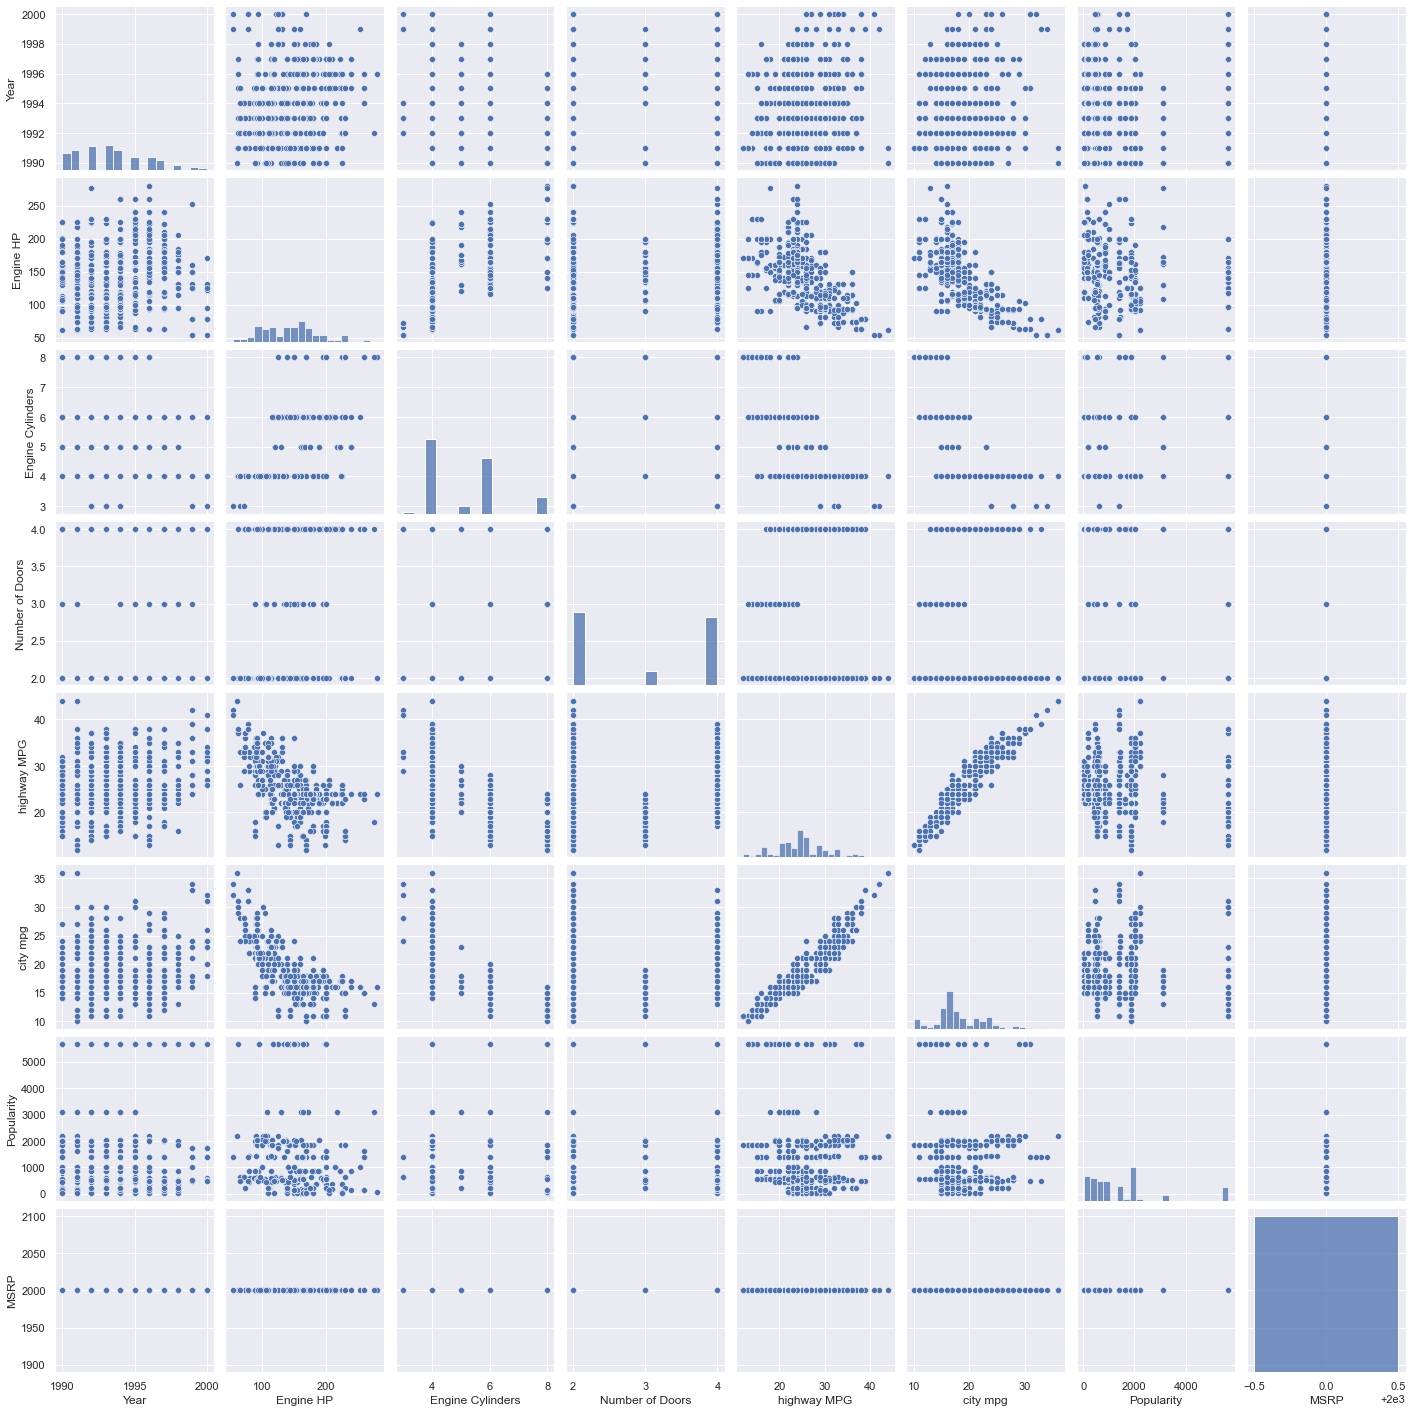

In [118]:
sb.pairplot(data = filtered)

In [119]:
#duplicates=pd.merge(train,filtered)
train_filtered=train.drop(filtered.index)
train_filtered.shape

(10878, 16)

In [120]:
make_filtered=pd.DataFrame(train_filtered["Make"])
make_filtered=make_filtered.astype("category")

#make_filtered.value_counts()

In [121]:
msrp_filtered=pd.DataFrame(train_filtered["MSRP"])
jointDF3 = pd.concat([msrp_filtered,make_filtered],axis = 1).reindex(msrp_filtered.index)


In [122]:
#jointDF["MSRP"].describe()

In [123]:
#jointDF3["MSRP"].describe()

In [124]:
#jointDF4["MSRP"].describe()

In [125]:
filtered2=train[train["MSRP"]<=10000]
train_filtered2=train.drop(filtered2.index)
#train_filtered.shape
msrp_filtered2=pd.DataFrame(train_filtered2["MSRP"])
make_filtered2=pd.DataFrame(train_filtered2["Make"])
make_filtered2=make_filtered2.astype("category")
jointDF4 = pd.concat([msrp_filtered2,make_filtered2],axis = 1).reindex(msrp_filtered2.index)
filtered2.corr()


Year  Engine HP  Engine Cylinders  Number of Doors  \
Year              1.000000   0.276673          0.100355         0.063776   
Engine HP         0.276673   1.000000          0.749000        -0.000094   
Engine Cylinders  0.100355   0.749000          1.000000        -0.025426   
Number of Doors   0.063776  -0.000094         -0.025426         1.000000   
highway MPG      -0.019274  -0.572446         -0.660333         0.091020   
city mpg         -0.024254  -0.678374         -0.733777         0.016781   
Popularity        0.050143   0.055128          0.228282        -0.135181   
MSRP              0.362012   0.505197          0.339988        -0.171086   

                  highway MPG  city mpg  Popularity      MSRP  
Year                -0.019274 -0.024254    0.050143  0.362012  
Engine HP           -0.572446 -0.678374    0.055128  0.505197  
Engine Cylinders    -0.660333 -0.733777    0.228282  0.339988  
Number of Doors      0.091020  0.016781   -0.135181 -0.171086  
highway MPG          1.000000  0.936153   -0.182349 -0.204993  
city mpg             0.936153  1.000000   -0.152914 -0.213934  
Popularity          -0.182349 -0.152914    1.000000  0.091092  
MSRP                -0.204993 -0.213934    0.091092  1.000000

In [126]:
filtered2["Year"].value_counts()

1993    209
1992    177
1997    171
1994    162
1991    152
1998    152
1995    134
1996    129
1990    123
1999    119
2000    117
2001      2
Name: Year, dtype: int64

In [127]:
filtered["Year"].value_counts()

1993    171
1992    161
1991    137
1994    134
1990    117
1995     91
1996     90
1997     68
1998     32
1999     20
2000     15
Name: Year, dtype: int64

Plot of the count of Make from original data set

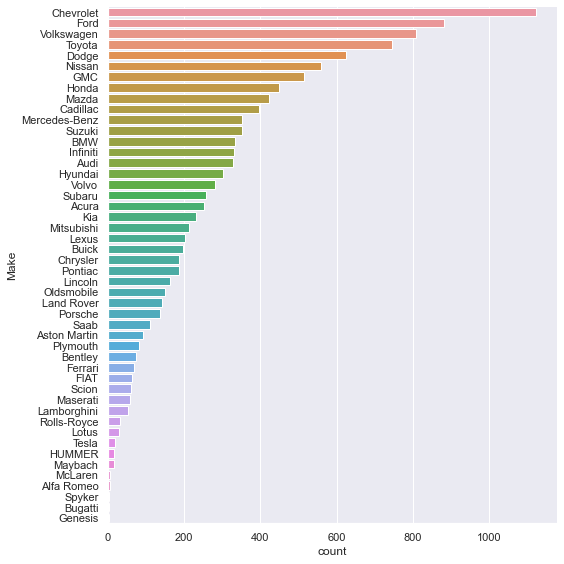

In [128]:
make=pd.DataFrame(train['Make'])
sb.catplot(y = 'Make', data = jointDF, 
           kind = "count", 
           height = 8, 
           order = jointDF['Make'].value_counts().index)

Plot of the count of Make data after filtering out the MSRP 2000 data

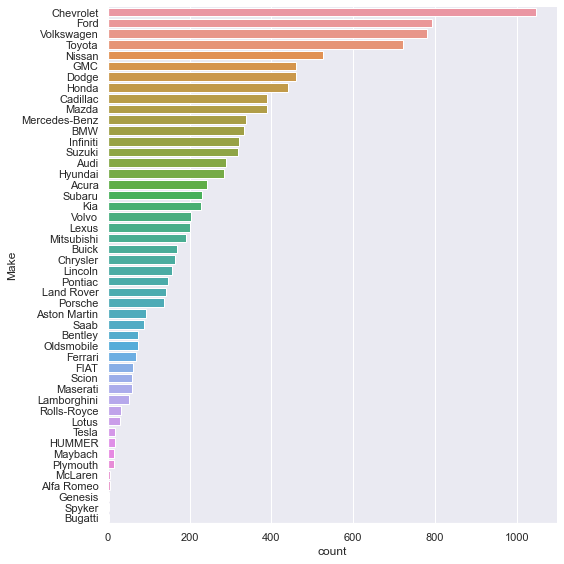

In [129]:
sb.catplot(y = 'Make', data = jointDF3, 
           kind = "count", 
           height = 8, 
           order = jointDF3['Make'].value_counts().index)

Plot of the count of Make data after filtering the MSRP in the range of above 2000 and less equal to 10000

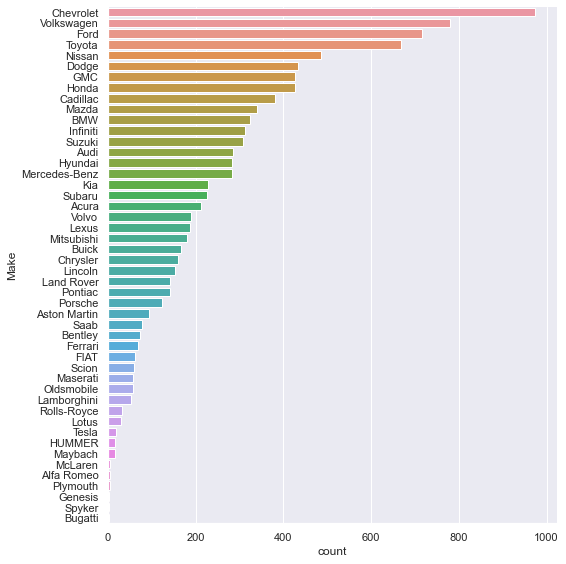

In [130]:
sb.catplot(y = 'Make', data = jointDF4, 
           kind = "count", 
           height = 8, 
           order = jointDF4['Make'].value_counts().index)

Original Data plot of MSRP against the make

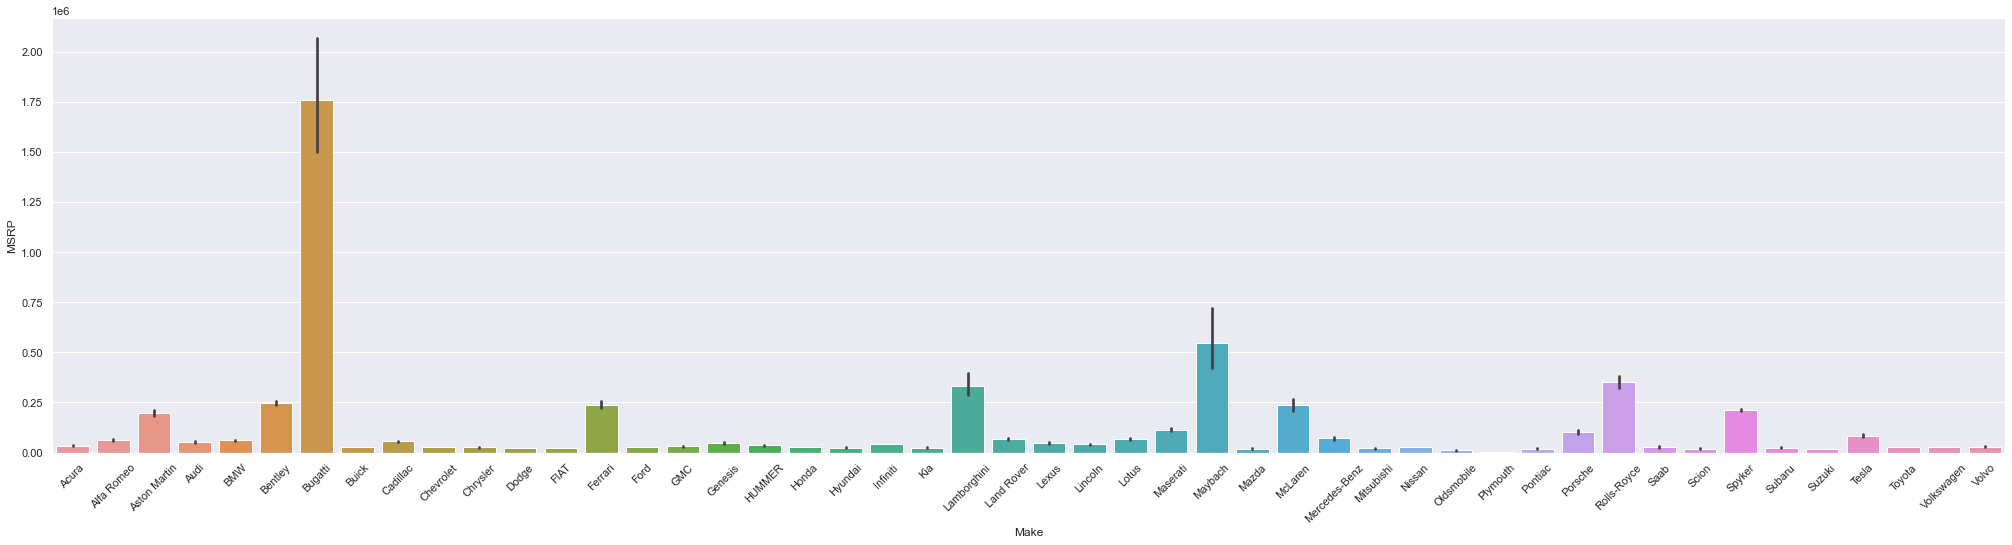

In [131]:
f = plt.figure(figsize=(35, 8))
sb.barplot(x = 'Make', y = 'MSRP', data = jointDF) 
           #order = jointDF.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

Plot of MSRP against the Make after filtering out the data whose MSRP is 2000

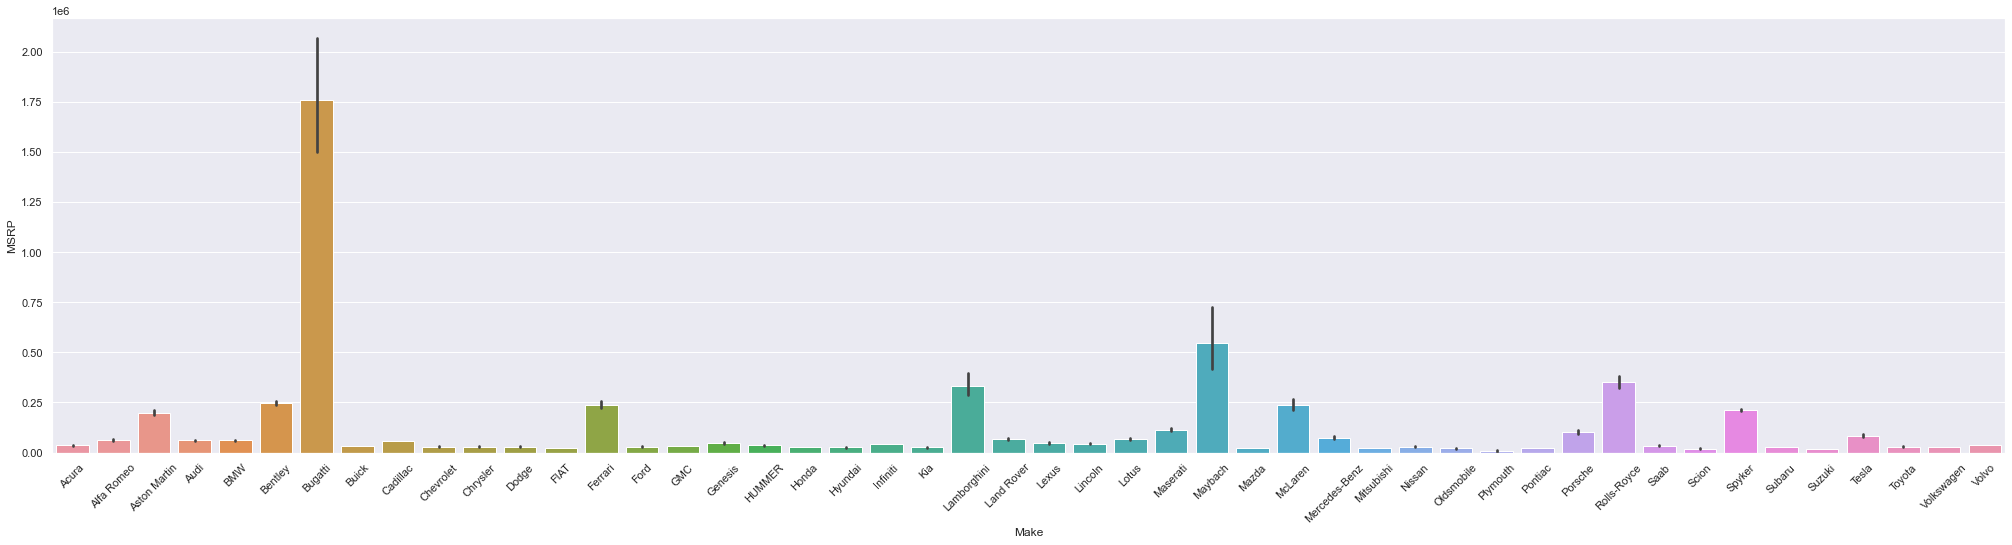

In [132]:
f = plt.figure(figsize=(35, 8))
sb.barplot(x = 'Make', y = 'MSRP', data = jointDF3) 
           #order = jointDF.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

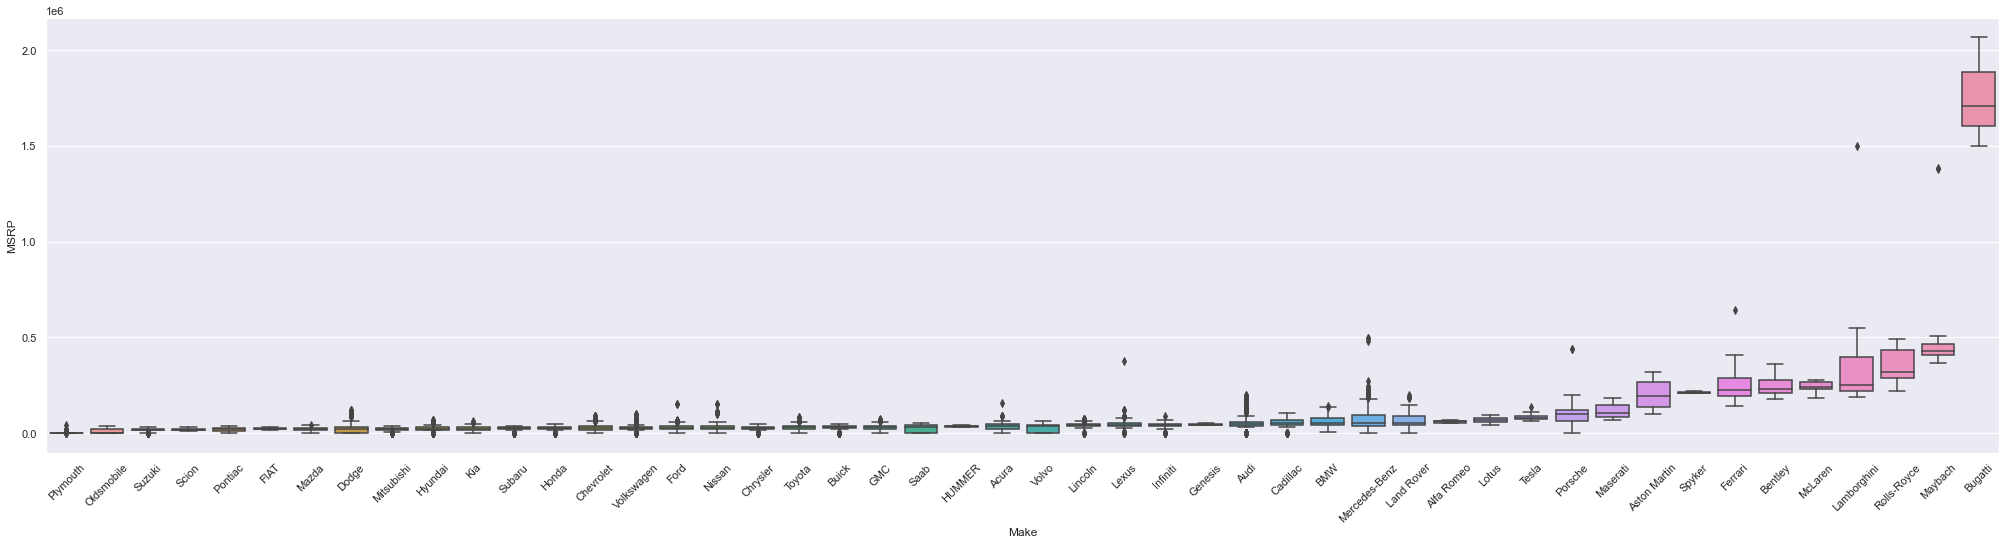

In [133]:
f = plt.figure(figsize=(35, 8))
sb.boxplot(x = 'Make', y = 'MSRP', data = jointDF, 
           order = jointDF.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

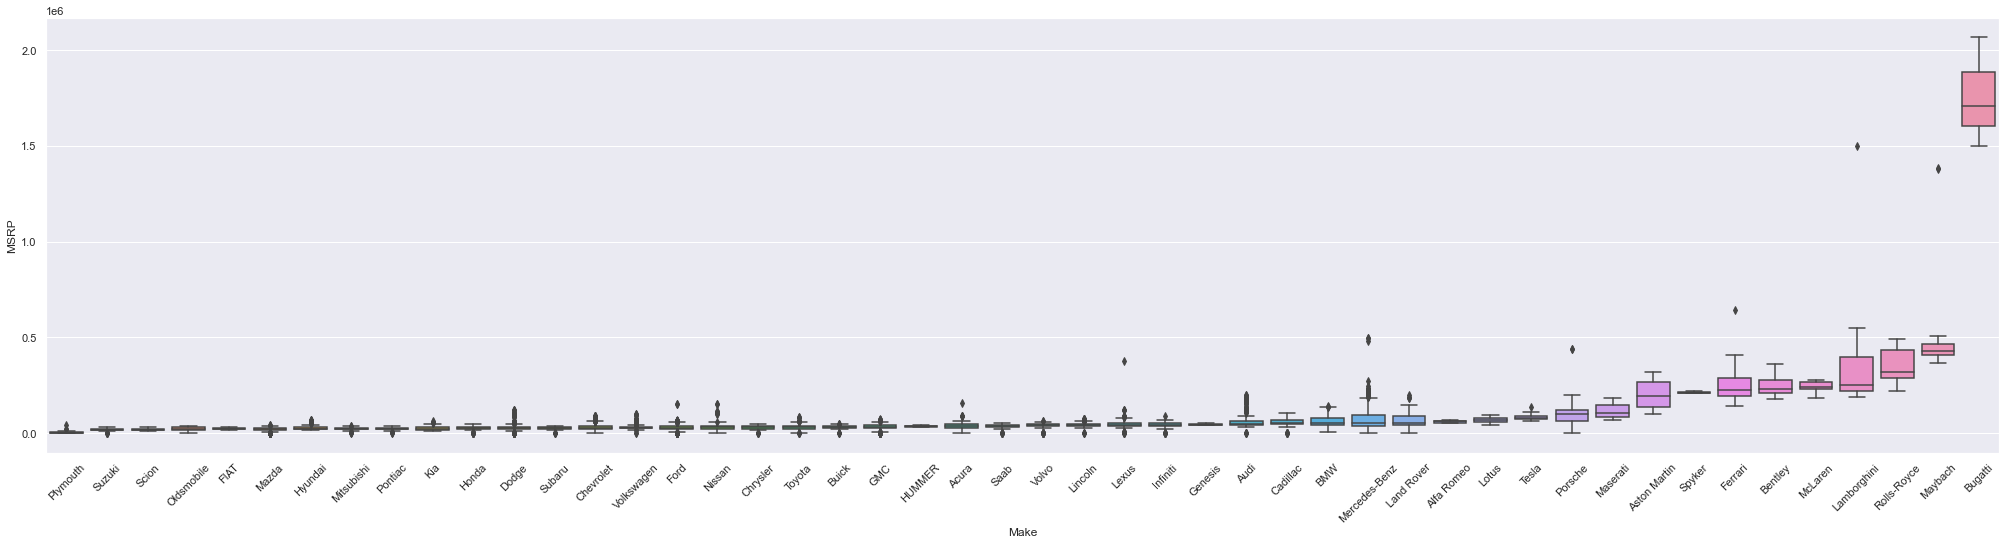

In [134]:
f = plt.figure(figsize=(35, 8))
sb.boxplot(x = 'Make', y = 'MSRP', data = jointDF3, 
           order = jointDF3.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

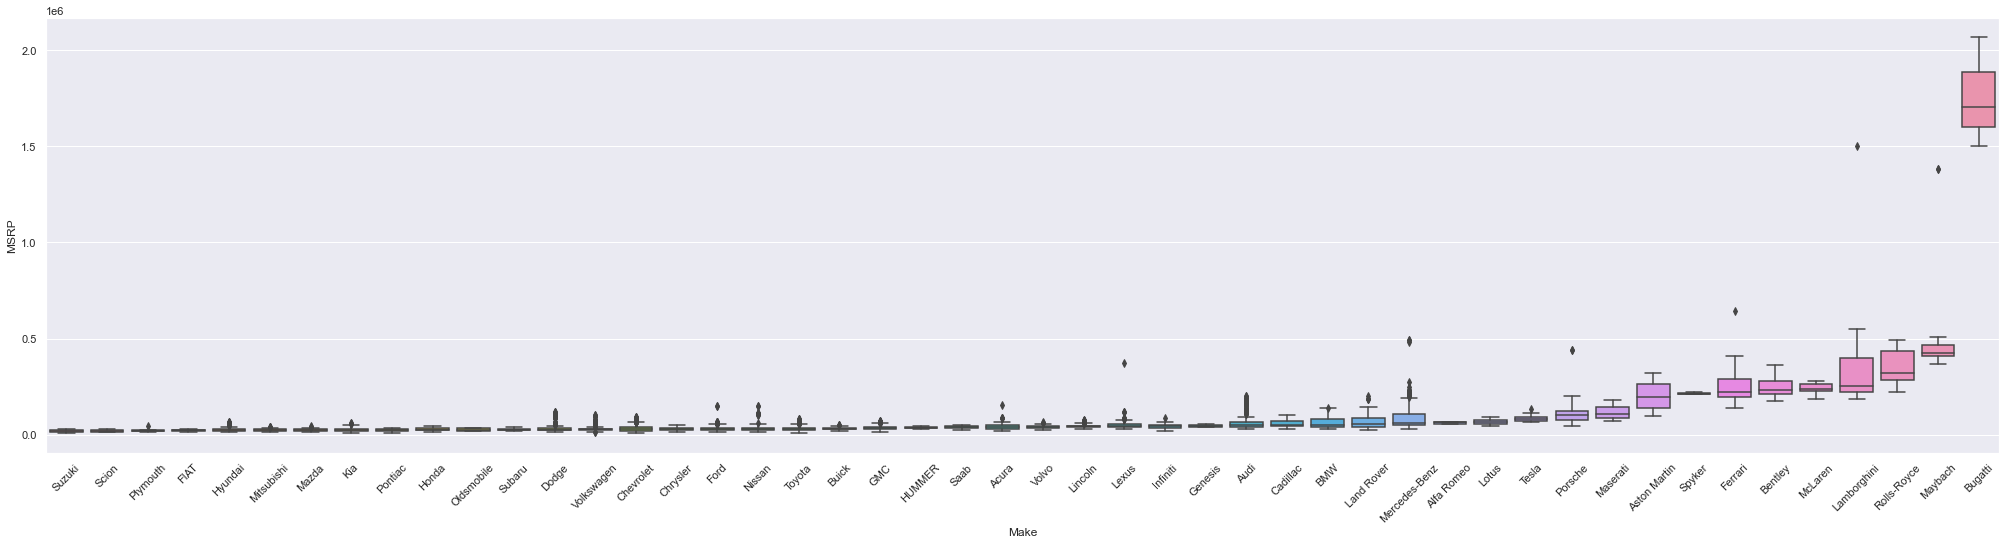

In [135]:
f = plt.figure(figsize=(35, 8))
sb.boxplot(x = 'Make', y = 'MSRP', data = jointDF4, 
           order = jointDF4.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

In [136]:
train_filterss.describe()

Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.100000e+04  
50%       26.000000     18.000000   1385.000000  2.999500e+04  
75%       30.000000     22.000000   2009.000000  4.223125e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

In [137]:
bugatti=train_filterss[train_filterss["Make"]=="Bugatti"]
bugatti.describe()

Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  \
count     3.000000        3.0               3.0              3.0          3.0   
mean   2008.333333     1001.0              16.0              2.0         14.0   
std       0.577350        0.0               0.0              0.0          0.0   
min    2008.000000     1001.0              16.0              2.0         14.0   
25%    2008.000000     1001.0              16.0              2.0         14.0   
50%    2008.000000     1001.0              16.0              2.0         14.0   
75%    2008.500000     1001.0              16.0              2.0         14.0   
max    2009.000000     1001.0              16.0              2.0         14.0   

       city mpg  Popularity          MSRP  
count       3.0         3.0  3.000000e+00  
mean        8.0       820.0  1.757224e+06  
std         0.0         0.0  2.864384e+05  
min         8.0       820.0  1.500000e+06  
25%         8.0       820.0  1.602884e+06  
50%         8.0       820.0  1.705769e+06  
75%         8.0       820.0  1.885836e+06  
max         8.0       820.0  2.065902e+06

In [138]:
anomaly=train_filterss[train_filterss["Make"]=="Bugatti"]
train_filter_final=train_filterss.drop(anomaly.index)
train_filter_final.describe()

Year     Engine HP  Engine Cylinders  Number of Doors  \
count  11911.000000  11842.000000      11881.000000     11905.000000   
mean    2010.384854    249.195660          5.626210         3.436455   
std        7.580621    108.548246          1.773139         0.881131   
min     1990.000000     55.000000          0.000000         2.000000   
25%     2007.000000    170.000000          4.000000         2.000000   
50%     2015.000000    227.000000          6.000000         4.000000   
75%     2016.000000    300.000000          6.000000         4.000000   
max     2017.000000    750.000000         12.000000         4.000000   

        highway MPG     city mpg    Popularity          MSRP  
count  11911.000000  11911.00000  11911.000000  1.191100e+04  
mean      26.640668     19.73621   1555.096298  4.016237e+04  
std        8.861847      8.98700   1441.989746  5.345820e+04  
min       12.000000      7.00000      2.000000  2.000000e+03  
25%       22.000000     16.00000    549.000000  2.099950e+04  
50%       26.000000     18.00000   1385.000000  2.999500e+04  
75%       30.000000     22.00000   2009.000000  4.221000e+04  
max      354.000000    137.00000   5657.000000  1.500000e+06

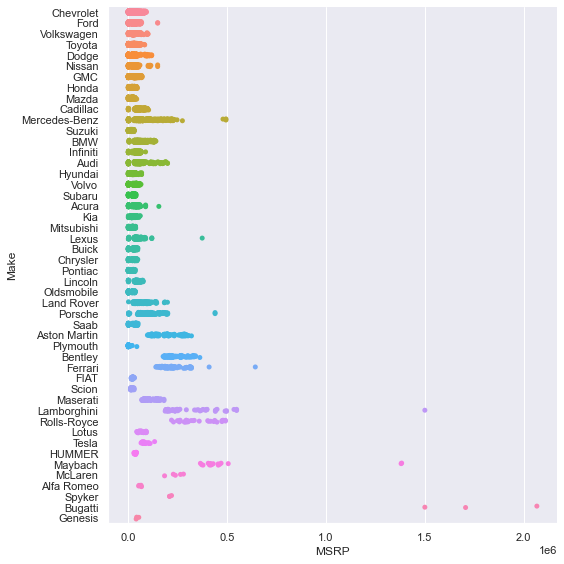

In [139]:
sb.catplot(y = 'Make', data = jointDF, 
           x="MSRP", 
           height = 8, 
           order = jointDF['Make'].value_counts().index)

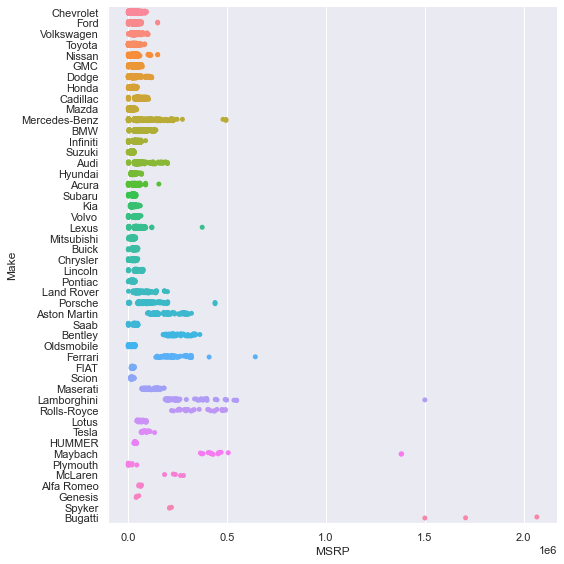

In [140]:
sb.catplot(y = 'Make', data = jointDF3, 
           x="MSRP", 
           height = 8, 
           order = jointDF3['Make'].value_counts().index)

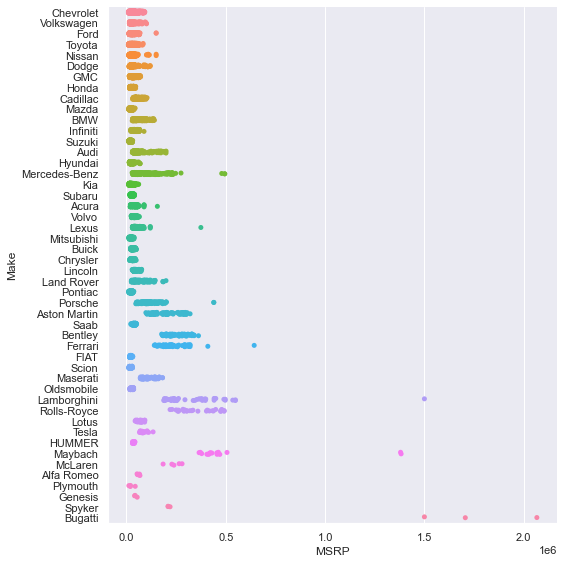

In [141]:
sb.catplot(y = 'Make', data = jointDF4, 
           x="MSRP", 
           height = 8, 
           order = jointDF4['Make'].value_counts().index)

filter out bugatti. Use the top 4 make to do a correlation with the msrp.

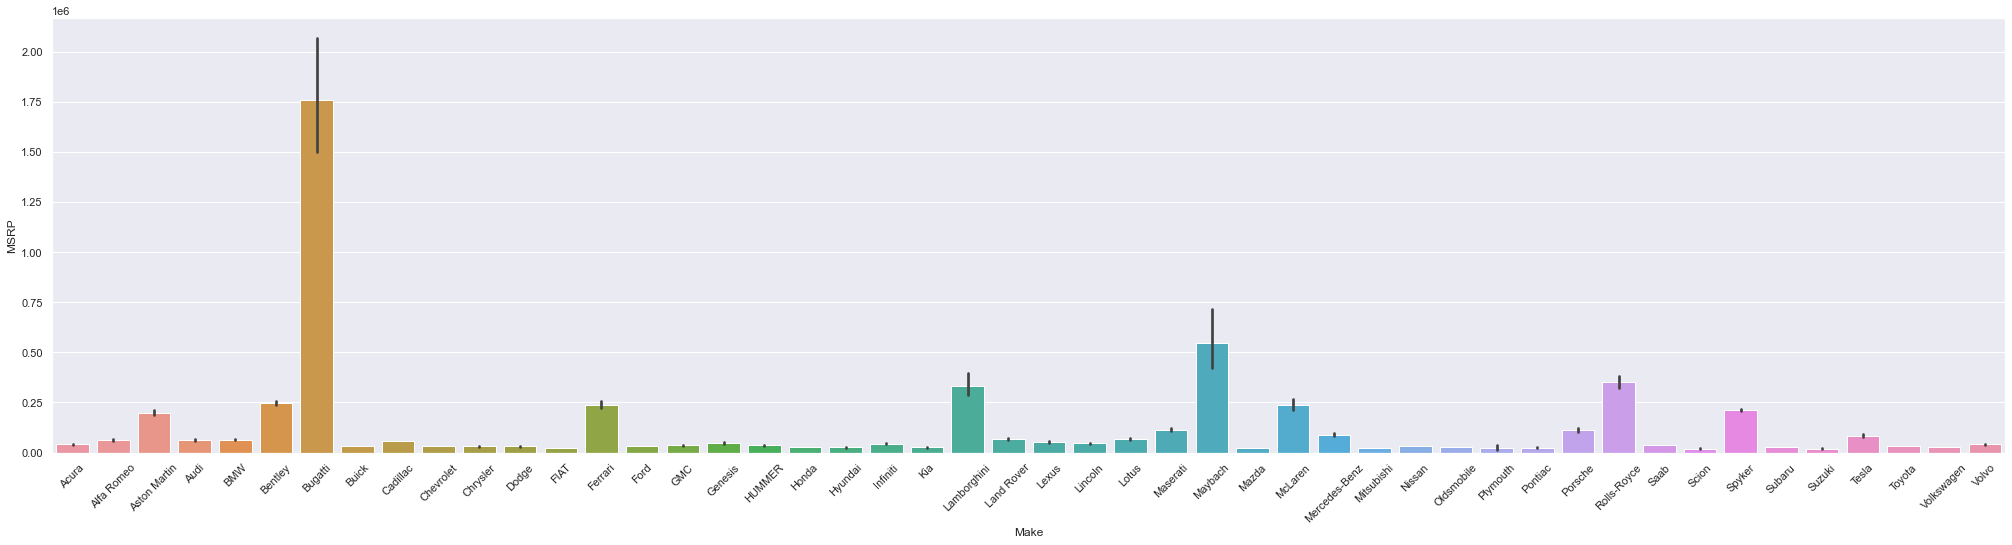

In [142]:
f = plt.figure(figsize=(35, 8))
sb.barplot(x = 'Make', y = 'MSRP', data = jointDF4) 
           #order = jointDF.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);


do filter_rule = (2000 == train_set["MSRP"])
filter_set = train_set[filter_rule]
then display
display year, make, msrp
replot rest of data
do random 80:20
which feature affect price most(boxplot, regression etc)


In [143]:
jointDF2 = pd.concat([msrp,year],axis = 1).reindex(msrp.index)
#jointDF2

In [144]:

 #sb.barplot(y = "Year", x = "MSRP", data = jointDF2)

In [145]:
mark =  pd.DataFrame(train["Market Category"])
train_filterss=train.drop(mark,axis=1)
#train_filterss

#df = pd.read_csv("newdata.csv",index_col=0)
#df = df.drop("Max",axis=0)

In [186]:
jointDF5

Year           Make
0      2011            BMW
1      2011            BMW
2      2011            BMW
3      2011            BMW
4      2011            BMW
5      2012            BMW
6      2012            BMW
7      2012            BMW
8      2012            BMW
9      2013            BMW
10     2013            BMW
11     2013            BMW
12     2013            BMW
13     2013            BMW
14     2013            BMW
15     2013            BMW
16     2013            BMW
17     1992           Audi
18     1992           Audi
19     1992           Audi
20     1992           Audi
21     1992           Audi
22     1993           Audi
23     1993           Audi
24     1993           Audi
25     1993           Audi
26     1993           Audi
27     1994           Audi
28     1994           Audi
29     1994           Audi
30     1994           Audi
31     1994           Audi
32     2017           FIAT
33     2017           FIAT
34     2017           FIAT
35     1991  Mercedes-Benz
36     1991  Mercedes-Benz
37     1992  Mercedes-Benz
38     1992  Mercedes-Benz
39     1993  Mercedes-Benz
40     1993  Mercedes-Benz
41     2016            BMW
42     2016            BMW
43     2016            BMW
44     2016            BMW
45     2016            BMW
46     2016            BMW
47     2016            BMW
48     2016            BMW
49     2016            BMW
50     2017            BMW
51     2017            BMW
52     2017            BMW
53     2017            BMW
54     2017            BMW
55     2017            BMW
56     2017            BMW
57     2017            BMW
58     1990           Audi
59     1990           Audi
60     1990           Audi
61     1991           Audi
62     1991           Audi
63     1991           Audi
64     2015       Chrysler
65     2015       Chrysler
66     2015       Chrysler
67     2015       Chrysler
68     2015       Chrysler
69     2015       Chrysler
70     2016       Chrysler
71     2016       Chrysler
72     2016       Chrysler
73     2016       Chrysler
74     2016       Chrysler
75     2016       Chrysler
76     2016       Chrysler
77     2016       Chrysler
78     2017       Chrysler
79     2017       Chrysler
80     2017       Chrysler
81     2017       Chrysler
82     2017       Chrysler
83     2017       Chrysler
84     2017       Chrysler
85     2017       Chrysler
86     2017       Chrysler
87     1996         Nissan
88     1996         Nissan
89     1996         Nissan
90     1997         Nissan
91     1997         Nissan
92     1997         Nissan
93     1998         Nissan
94     1998         Nissan
95     1998         Nissan
96     1996         Nissan
97     1996         Nissan
98     1997         Nissan
99     1997         Nissan
100    1997         Nissan
101    1998         Nissan
102    1998         Nissan
103    1998         Nissan
104    1991          Volvo
105    1991          Volvo
106    1991          Volvo
107    1992          Volvo
108    1992          Volvo
109    1992          Volvo
110    1993          Volvo
111    1993          Volvo
112    2012          Mazda
113    2012          Mazda
114    2012          Mazda
115    2012          Mazda
116    2013          Mazda
117    2013          Mazda
118    2013          Mazda
119    2013          Mazda
120    2014          Mazda
121    2014          Mazda
122    2014          Mazda
123    2014          Mazda
124    2015            BMW
125    2015            BMW
126    2015            BMW
127    2016            BMW
128    2016            BMW
129    2017            BMW
130    2017            BMW
131    2015            BMW
132    2015            BMW
133    2015            BMW
134    2015            BMW
135    2015            BMW
136    2015            BMW
137    2015            BMW
138    2015            BMW
139    2015            BMW
140    2015            BMW
141    2015            BMW
142    2015            BMW
143    2015            BMW
144    2016            BMW
145    2016            BMW
146    2016            BMW
147    2016

In [147]:
#make_filtered2.describe()

In [148]:
#len(jointDF4["Make"].index)

(array([   0.,  500., 1000., 1500., 2000., 2500.]), [])

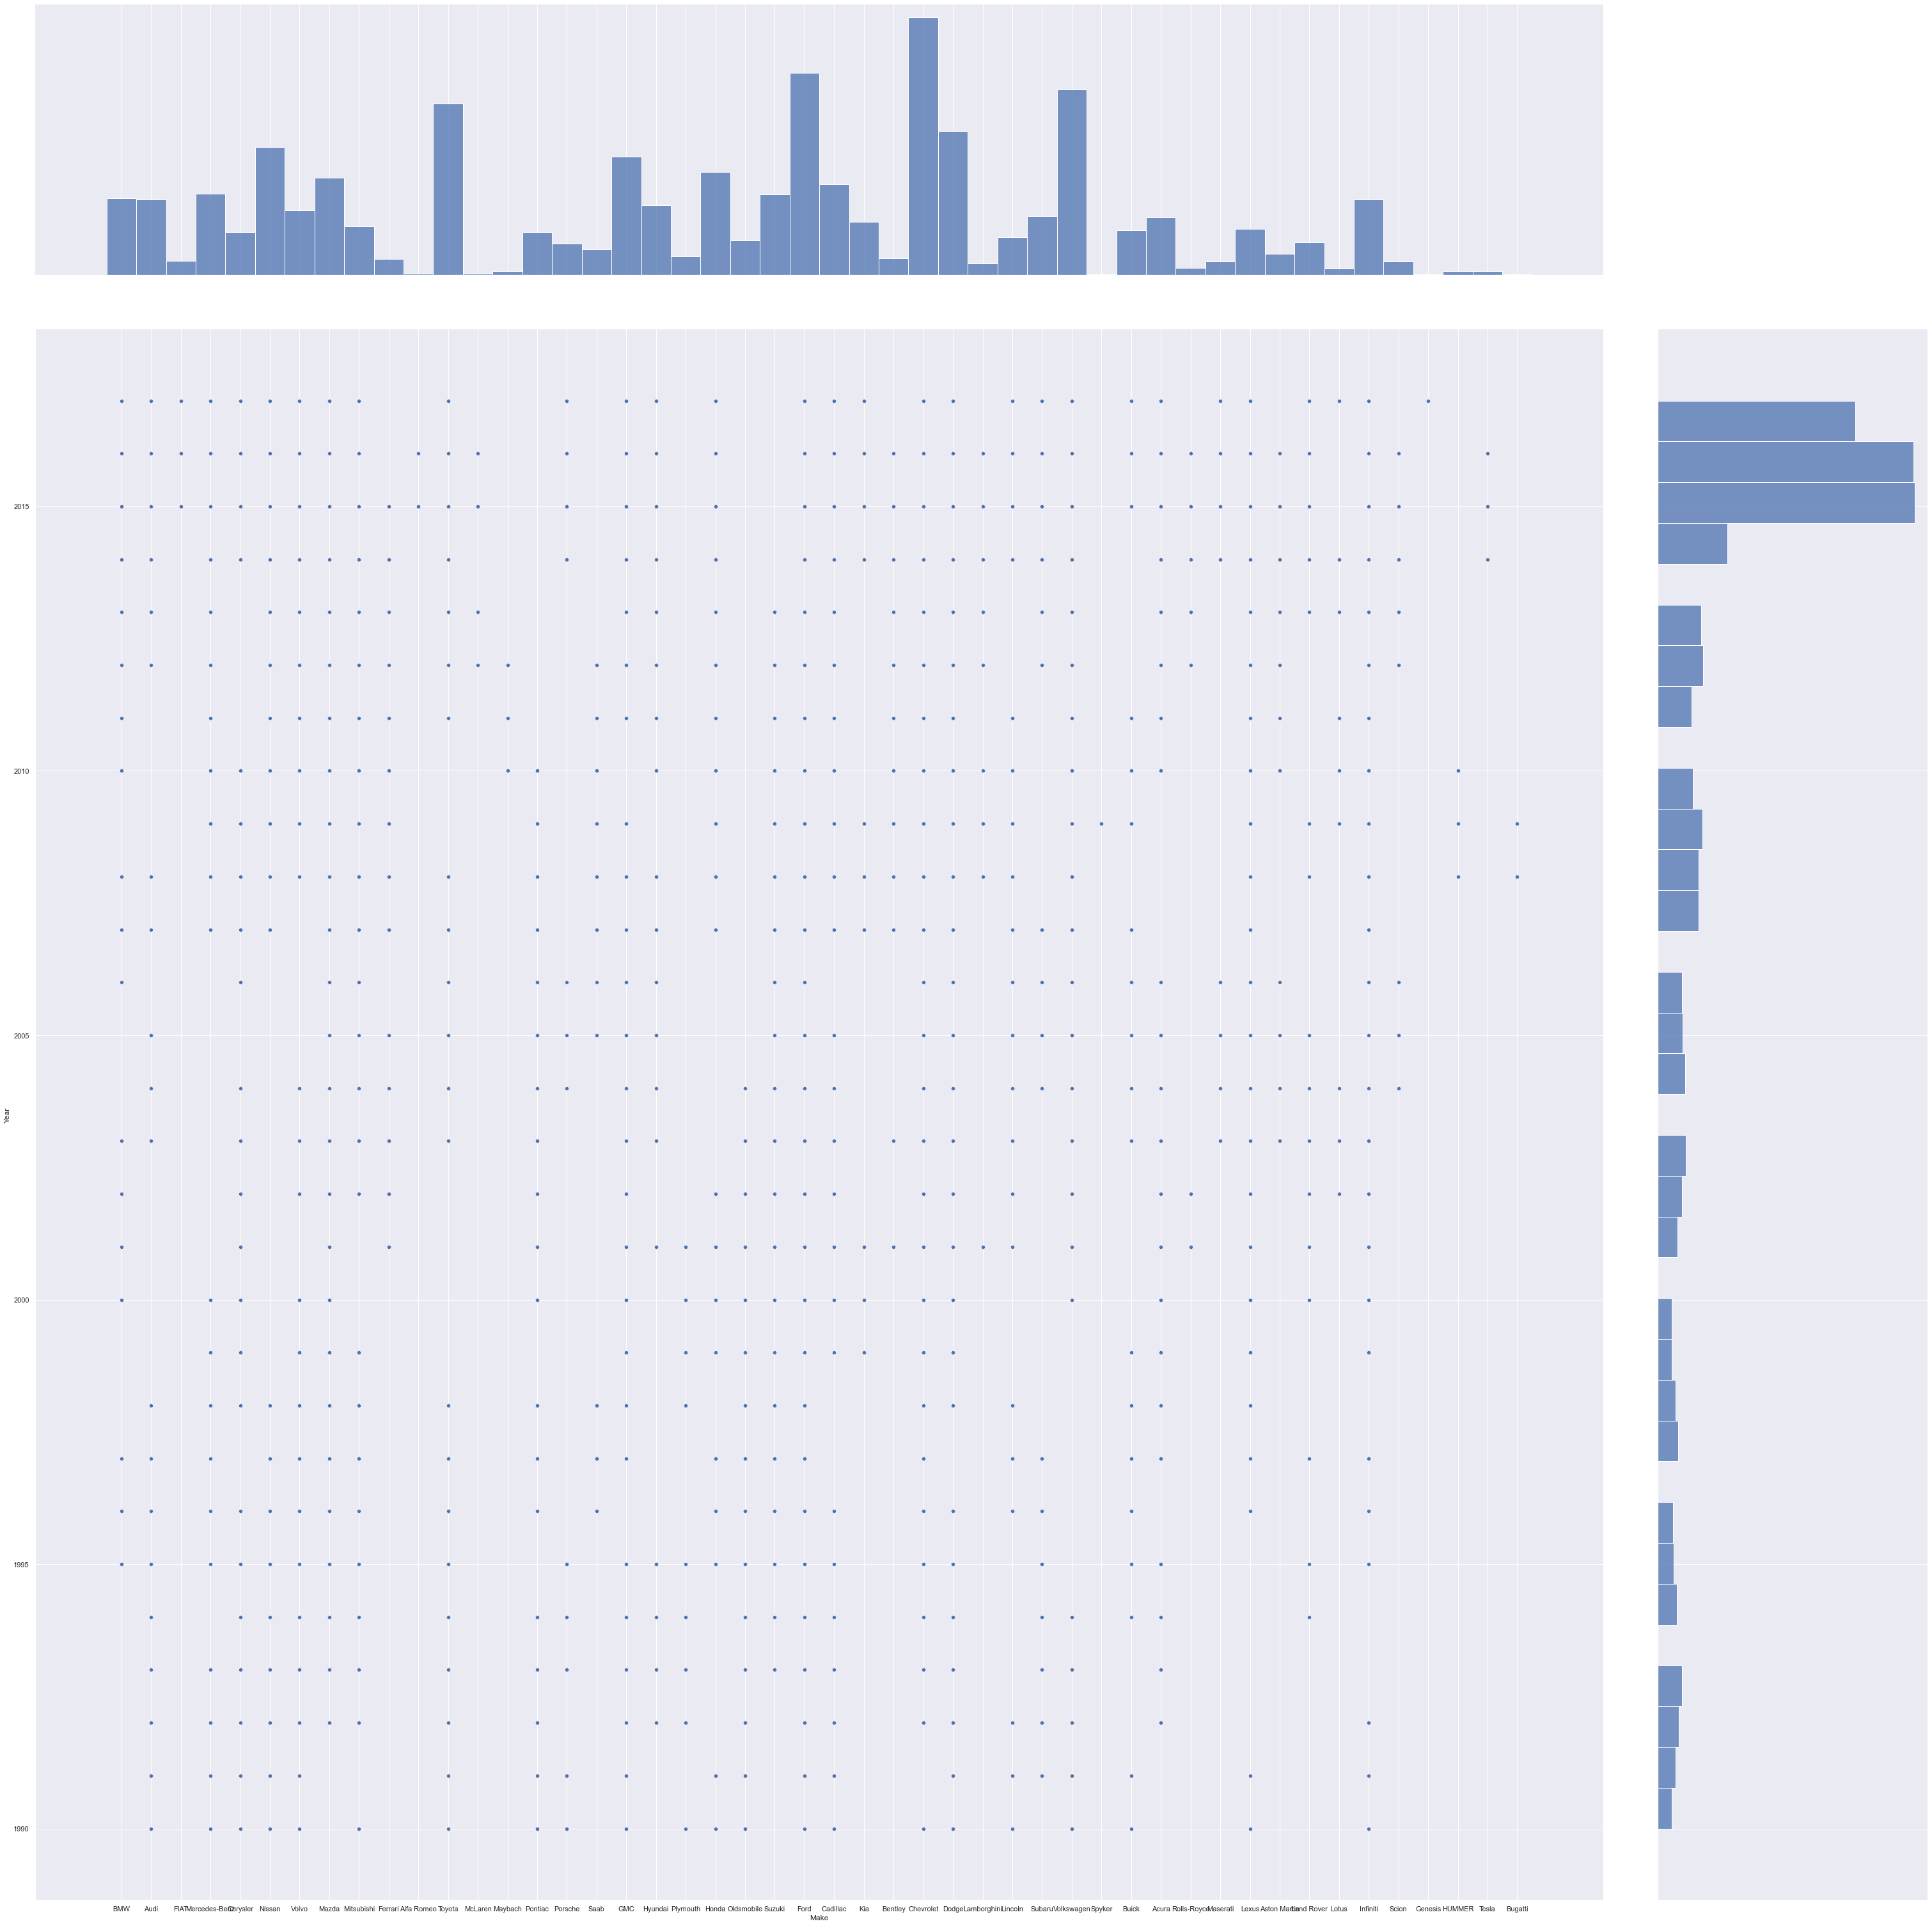

In [149]:
jointDF5 = pd.concat([year,make], axis = 1).reindex(year.index)
sb.jointplot(x = "Make", y = "Year", data = jointDF5, height =42)
plt.xticks(rotation=45)

In [150]:
chevrolet=train_filterss[train_filterss["Make"]=="Chevrolet"]
volkswagen=train_filterss[train_filterss["Make"]=="Volkswagen"]
ford=train_filterss[train_filterss["Make"]=="Ford"]
toyota=train_filterss[train_filterss["Make"]=="Toyota"]
nissan=train_filterss[train_filterss["Make"]=="Nissan"]

In [151]:
#chevrolet

In [152]:
#volkswagen

In [153]:
#ford

In [154]:
#toyota

In [155]:
#nissan

1)Plot the correlation matrix of the int features with respect to the individual top 4 brands
2)see the top feature with the highest correlation with respect to the top 4 brands
3)do a train test split; import the sci kit learn linear regression and train test split
4)split train:test 80:20
5) plot regression line

In [156]:
chevrolet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1123 entries, 1476 to 11267
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               1123 non-null   object 
 1   Model              1123 non-null   object 
 2   Year               1123 non-null   int64  
 3   Engine Fuel Type   1123 non-null   object 
 4   Engine HP          1117 non-null   float64
 5   Engine Cylinders   1121 non-null   float64
 6   Transmission Type  1123 non-null   object 
 7   Driven_Wheels      1123 non-null   object 
 8   Number of Doors    1123 non-null   float64
 9   Vehicle Size       1123 non-null   object 
 10  Vehicle Style      1123 non-null   object 
 11  highway MPG        1123 non-null   int64  
 12  city mpg           1123 non-null   int64  
 13  Popularity         1123 non-null   int64  
 14  MSRP               1123 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 140.4+ KB


In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [158]:
chevrolet=chevrolet.dropna()
chevrolet_y = pd.DataFrame(chevrolet["MSRP"])
chevrolet_x = pd.DataFrame(chevrolet [["Year", "Engine HP", "highway MPG","city mpg"]])

In [159]:
chevrolet_x_train,chevrolet_x_test, chevrolet_y_train, chevrolet_y_test = train_test_split(chevrolet_x, chevrolet_y, test_size = 0.2)

In [160]:
chevrolet_train = pd.concat([chevrolet_y_train, chevrolet_x_train], axis = 1).reindex(chevrolet_y_train.index)
chevrolet_train.corr()

MSRP      Year  Engine HP  highway MPG  city mpg
MSRP         1.000000  0.653478   0.852460    -0.113545 -0.128554
Year         0.653478  1.000000   0.387106     0.289611  0.191444
Engine HP    0.852460  0.387106   1.000000    -0.338000 -0.316808
highway MPG -0.113545  0.289611  -0.338000     1.000000  0.944996
city mpg    -0.128554  0.191444  -0.316808     0.944996  1.000000

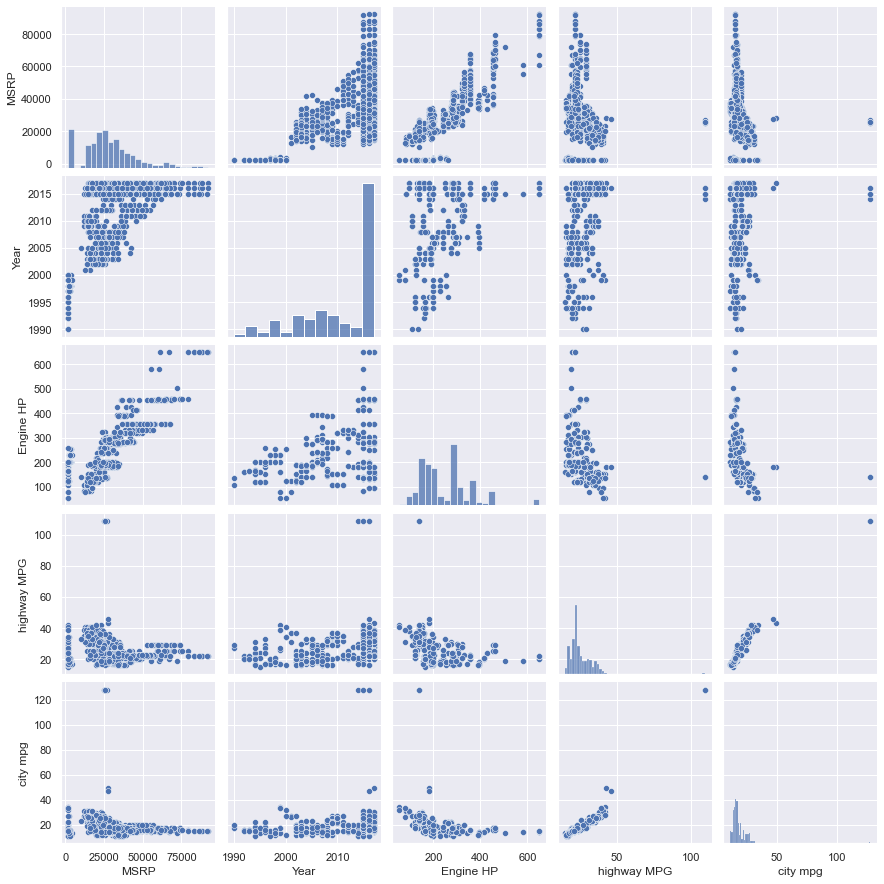

In [161]:
sb.pairplot(data = chevrolet_train)

In [162]:
chevrolet_train2= pd.DataFrame(chevrolet[["Engine Cylinders", "Number of Doors", "Popularity"]])
chevrolet_train2 = pd.concat([chevrolet_y_train,chevrolet_train2], axis = 1).reindex(chevrolet_y_train.index)
chevrolet_train2.corr()

MSRP  Engine Cylinders  Number of Doors  Popularity
MSRP              1.000000          0.525610        -0.019397         NaN
Engine Cylinders  0.525610          1.000000        -0.180238         NaN
Number of Doors  -0.019397         -0.180238         1.000000         NaN
Popularity             NaN               NaN              NaN         NaN

In [163]:
volks_y = pd.DataFrame(volkswagen["MSRP"])
volks_x = pd.DataFrame(volkswagen [["Year", "Engine HP", "highway MPG","city mpg"]])
volks_x_train, volks_x_test,volks_y_train, volks_y_test = train_test_split(volks_x, volks_y, test_size = 0.2)
volks_train = pd.concat([volks_y_train, volks_x_train], axis = 1).reindex(volks_y_train.index)
volks_z= pd.DataFrame(volkswagen[["Engine Cylinders", "Number of Doors", "Popularity"]])
volks_train.corr()

MSRP      Year  Engine HP  highway MPG  city mpg
MSRP         1.000000  0.360693   0.807843    -0.113554 -0.067683
Year         0.360693  1.000000   0.293153     0.361396  0.226510
Engine HP    0.807843  0.293153   1.000000    -0.341462 -0.287966
highway MPG -0.113554  0.361396  -0.341462     1.000000  0.938358
city mpg    -0.067683  0.226510  -0.287966     0.938358  1.000000

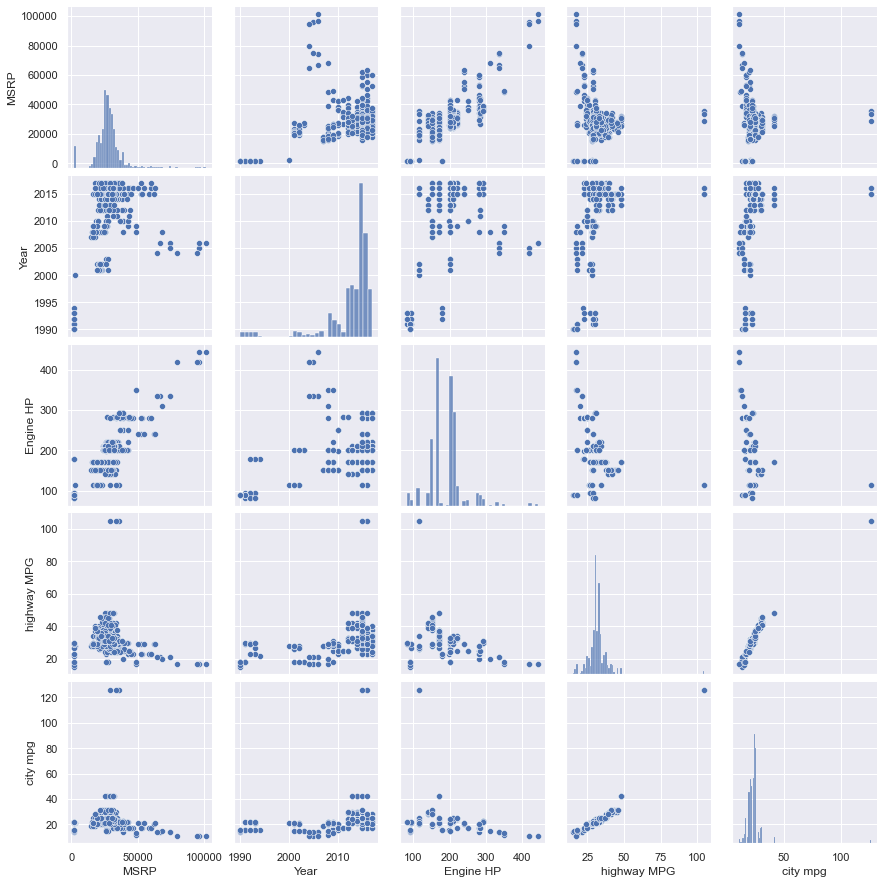

In [164]:
sb.pairplot(data = volks_train)

In [165]:
volks_train2 =  pd.concat([volks_y_train, volks_z], axis = 1).reindex(volks_y_train.index)
volks_train2.corr()

MSRP  Engine Cylinders  Number of Doors  Popularity
MSRP              1.000000          0.614447         0.243364         NaN
Engine Cylinders  0.614447          1.000000         0.125274         NaN
Number of Doors   0.243364          0.125274         1.000000         NaN
Popularity             NaN               NaN              NaN         NaN

In [166]:
ford=ford.dropna()
ford_y = pd.DataFrame(ford["MSRP"])
ford_x = pd.DataFrame(ford [["Year", "Engine HP", "highway MPG","city mpg"]])
ford_x_train, ford_x_test,ford_y_train, ford_y_test = train_test_split(ford_x, ford_y, test_size = 0.2)
ford_train = pd.concat([ford_y_train, ford_x_train], axis = 1).reindex(ford_y_train.index)
ford_z= pd.DataFrame(ford[["Engine Cylinders", "Number of Doors", "Popularity"]])
ford_train2 =  pd.concat([ford_y_train, ford_z], axis = 1).reindex(ford_y_train.index)
ford_train.corr()

MSRP      Year  Engine HP  highway MPG  city mpg
MSRP         1.000000  0.704722   0.749953    -0.054391 -0.072662
Year         0.704722  1.000000   0.485647     0.278892  0.221777
Engine HP    0.749953  0.485647   1.000000    -0.305966 -0.351283
highway MPG -0.054391  0.278892  -0.305966     1.000000  0.899870
city mpg    -0.072662  0.221777  -0.351283     0.899870  1.000000

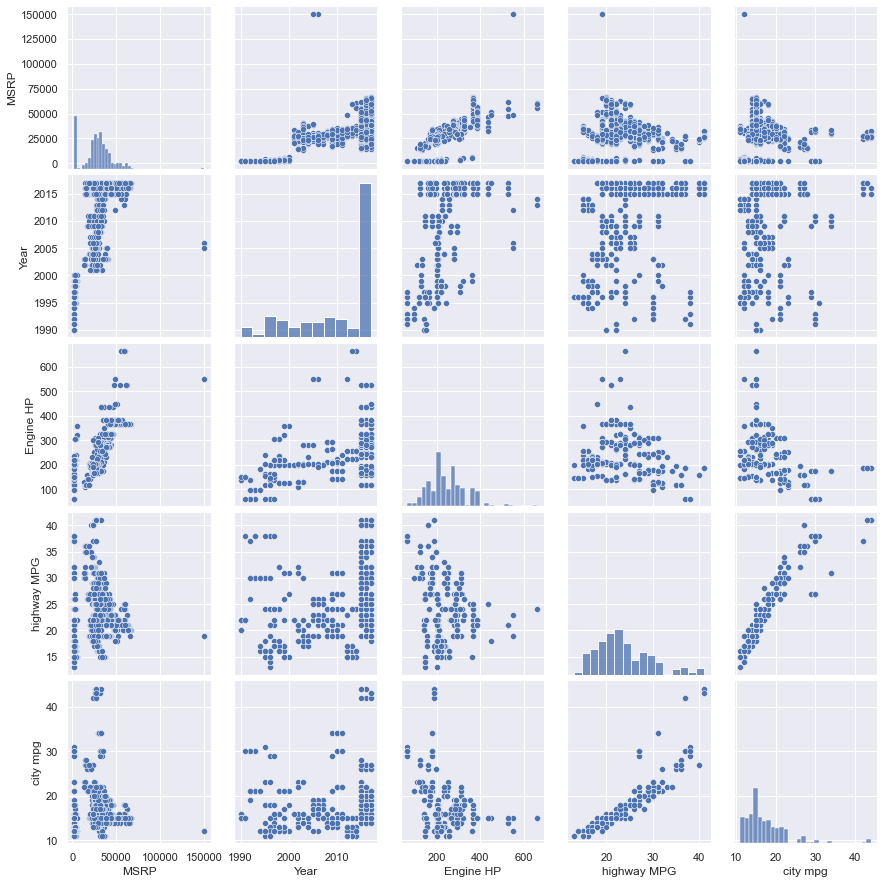

In [167]:
sb.pairplot(data = ford_train)

In [168]:
ford_train2.corr()

MSRP  Engine Cylinders  Number of Doors  Popularity
MSRP              1.000000          0.109620         0.266775         NaN
Engine Cylinders  0.109620          1.000000        -0.222939         NaN
Number of Doors   0.266775         -0.222939         1.000000         NaN
Popularity             NaN               NaN              NaN         NaN

In [169]:
toyota=toyota.dropna()
toyota_y = pd.DataFrame(toyota["MSRP"])
toyota_x = pd.DataFrame(toyota [["Year", "Engine HP", "highway MPG","city mpg"]])
toyota_x_train, toyota_x_test,toyota_y_train, toyota_y_test = train_test_split(toyota_x, toyota_y, test_size = 0.2)
toyota_train = pd.concat([toyota_y_train, toyota_x_train], axis = 1).reindex(toyota_y_train.index)
toyota_z= pd.DataFrame(toyota[["Engine Cylinders", "Number of Doors", "Popularity"]])
toyota_train2 =  pd.concat([toyota_y_train, toyota_z], axis = 1).reindex(toyota_y_train.index)
toyota_train.corr()

MSRP      Year  Engine HP  highway MPG  city mpg
MSRP         1.000000  0.735608   0.728325    -0.266742 -0.197600
Year         0.735608  1.000000   0.400115     0.117648  0.144876
Engine HP    0.728325  0.400115   1.000000    -0.715627 -0.630043
highway MPG -0.266742  0.117648  -0.715627     1.000000  0.939491
city mpg    -0.197600  0.144876  -0.630043     0.939491  1.000000

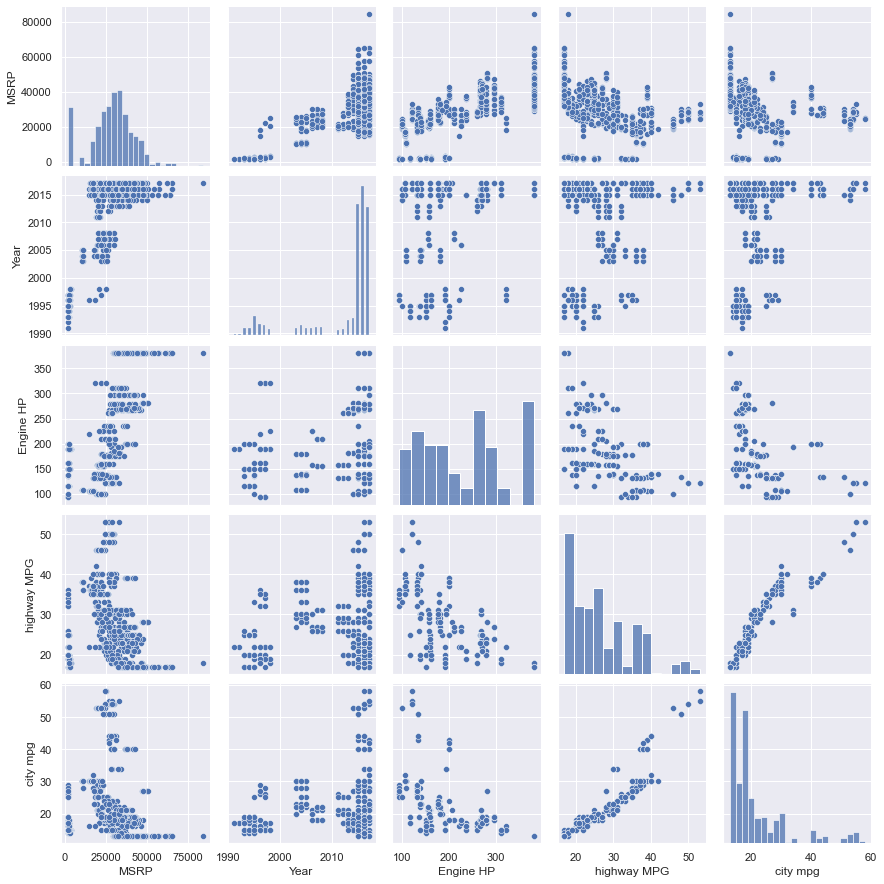

In [170]:
sb.pairplot(data = toyota_train)

In [171]:
toyota_train2.corr()

MSRP  Engine Cylinders  Number of Doors  Popularity
MSRP              1.000000          0.599915         0.575792         NaN
Engine Cylinders  0.599915          1.000000         0.194895         NaN
Number of Doors   0.575792          0.194895         1.000000         NaN
Popularity             NaN               NaN              NaN         NaN

In [172]:
nissan=nissan.dropna()
nissan_y = pd.DataFrame(nissan["MSRP"])
nissan_x = pd.DataFrame(nissan [["Year", "Engine HP", "highway MPG","city mpg"]])


In [173]:
nissan_x_train, nissan_x_test,nissan_y_train, nissan_y_test = train_test_split(nissan_x, nissan_y, test_size = 0.2)
nissan_train = pd.concat([nissan_y_train, nissan_x_train], axis = 1).reindex(nissan_y_train.index)
nissan_z= pd.DataFrame(nissan[["Engine Cylinders", "Number of Doors", "Popularity"]])
nissan_train2 =  pd.concat([nissan_y_train, nissan_z], axis = 1).reindex(nissan_y_train.index)
nissan_train.corr()

MSRP      Year  Engine HP  highway MPG  city mpg
MSRP         1.000000  0.542532   0.852753    -0.276123 -0.327615
Year         0.542532  1.000000   0.355453     0.148338  0.127852
Engine HP    0.852753  0.355453   1.000000    -0.554533 -0.635732
highway MPG -0.276123  0.148338  -0.554533     1.000000  0.954373
city mpg    -0.327615  0.127852  -0.635732     0.954373  1.000000

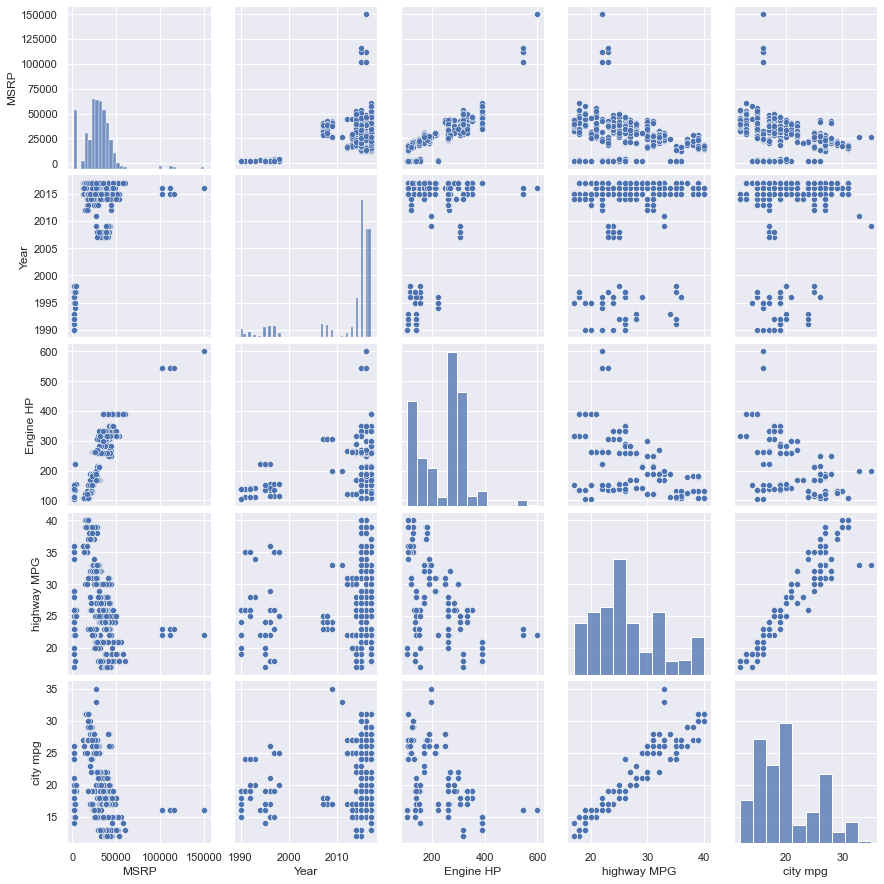

In [174]:
sb.pairplot(data = nissan_train)

In [175]:
nissan_train2.corr()

MSRP  Engine Cylinders  Number of Doors  Popularity
MSRP              1.000000          0.567991        -0.042064         NaN
Engine Cylinders  0.567991          1.000000         0.007618         NaN
Number of Doors  -0.042064          0.007618         1.000000         NaN
Popularity             NaN               NaN              NaN         NaN

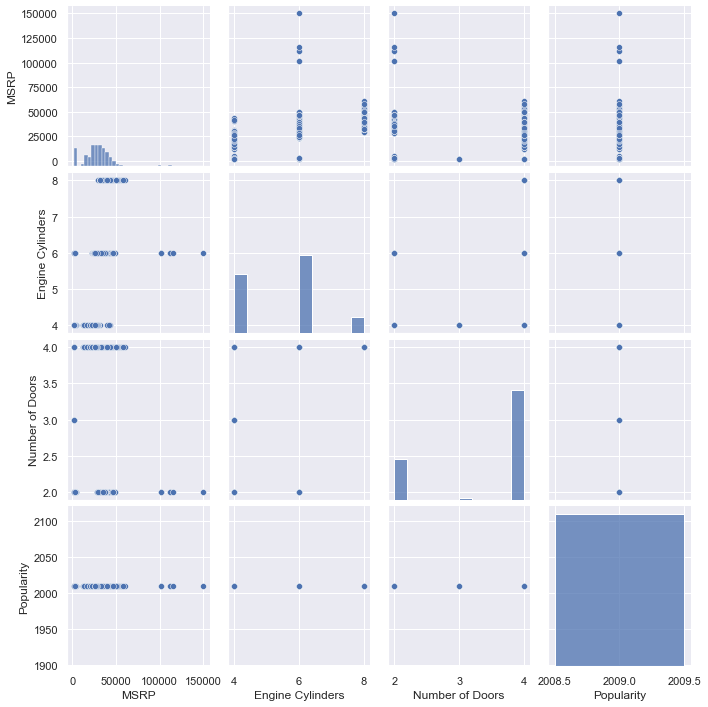

In [188]:
#sb.pairplot(data = nissan_train2)

In [176]:
def mean_sq_err(actual,predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) -np.array(predicted)))

Intercept of Regression 	: b =  [-1871274.80223759]
Coefficients of Regression 	: a = [[ 931.15690452  113.9433514  -108.52414709  140.07808039]]
    Predictors  Coefficients
0         Year    931.156905
1    Engine HP    113.943351
2  highway MPG   -108.524147
3     city mpg    140.078080

Goodness of Fit of Model 	Train Dataset
Explained Variance(train) (R^2) 	: 0.8506434739864743
Mean Squared Error (MSE) 	: 45543616.77506218
Explained Variance(test),prediction accuracy (R^2) 	: 83.10311975011481

Prediction accuracy 	Test Dataset
Explained Variance (R^2) 	: 0.8310311975011482
Mean Squared Error (MSE) 	: 46717342.49676964



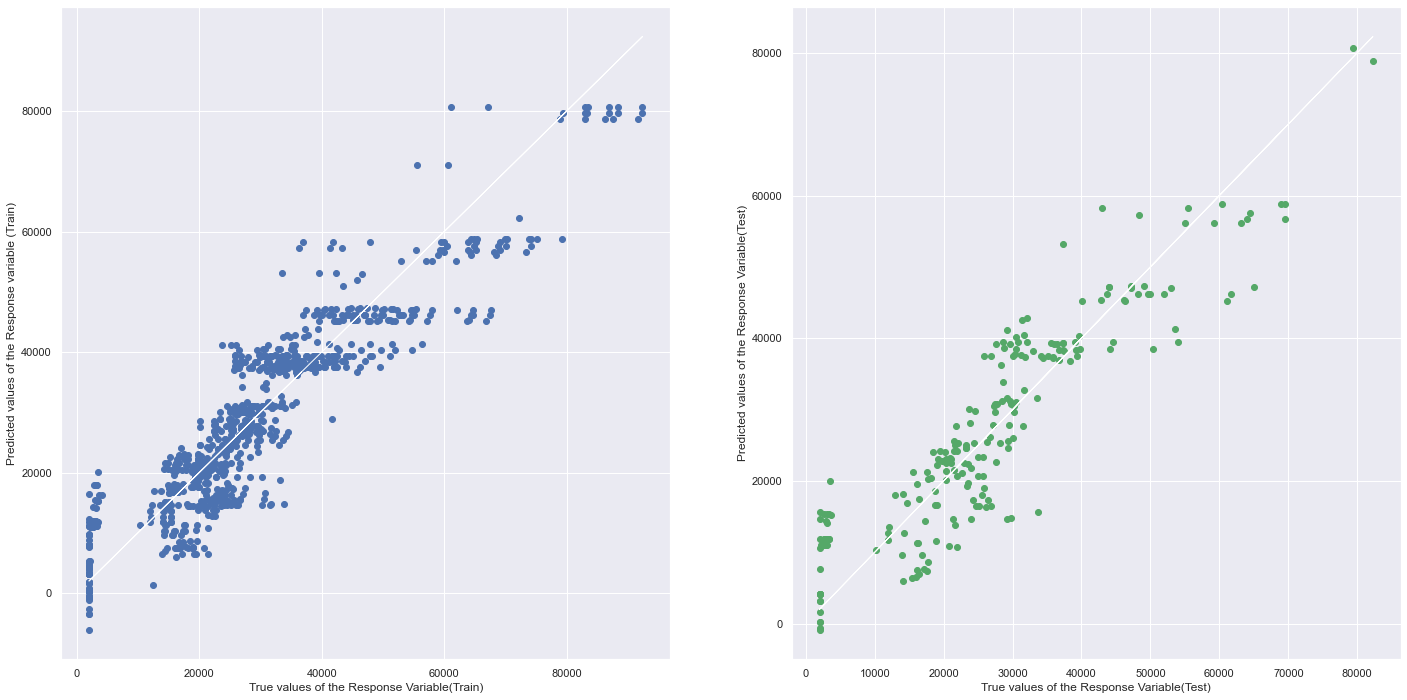

In [187]:
linreg = LinearRegression()  # create the linear regression object
linreg.fit(chevrolet_x_train,chevrolet_y_train)  # train the linear regression model
# Coefficients of the Linear Regression Line
print("Intercept of Regression \t: b = ",linreg.intercept_)
print("Coefficients of Regression \t: a =",linreg.coef_)
print(pd.DataFrame(list(zip(chevrolet_x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to HP
chevrolet_y_train_pred = linreg.predict(chevrolet_x_train)
chevrolet_y_test_pred = linreg.predict(chevrolet_x_test)

# Check the Goodness of Fit on train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance(train) (R^2) \t:",linreg.score(chevrolet_x_train,chevrolet_y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(chevrolet_y_train,chevrolet_y_train_pred))
print("Explained Variance(test),prediction accuracy (R^2) \t:",100*linreg.score(chevrolet_x_test,chevrolet_y_test))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(chevrolet_x_test,chevrolet_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(chevrolet_y_test, chevrolet_y_test_pred))
print()

# Plot the Predictions vs the True Values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(chevrolet_y_train,chevrolet_y_train_pred,color = 'b')
axes[0].plot(chevrolet_y_train,chevrolet_y_train,'w-',linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable(Train)")
axes[0].set_ylabel("Predicted values of the Response variable (Train)")
axes[1].scatter(chevrolet_y_test,chevrolet_y_test_pred,color="g")
axes[1].plot(chevrolet_y_test,chevrolet_y_test,'w-',linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable(Test)")
axes[1].set_ylabel("Predicted values of the Response Variable(Test)")
plt.show()

Intercept of Regression 	: b =  [-401930.15518687]
Coefficients of Regression 	: a = [[194.22433141 188.83144475 -66.70187289 229.97918358]]
    Predictors  Coefficients
0         Year    194.224331
1    Engine HP    188.831445
2  highway MPG    -66.701873
3     city mpg    229.979184

Goodness of Fit of Model 	Train Dataset
Explained Variance(train) (R^2) 	: 0.6881637489522341
Mean Squared Error (MSE) 	: 36143678.61275399
Explained Variance(test),prediction accuracy (R^2) 	: 70.16775677737421

Prediction accuracy 	Test Dataset
Explained Variance (R^2) 	: 0.7016775677737421
Mean Squared Error (MSE) 	: 32206738.179890357



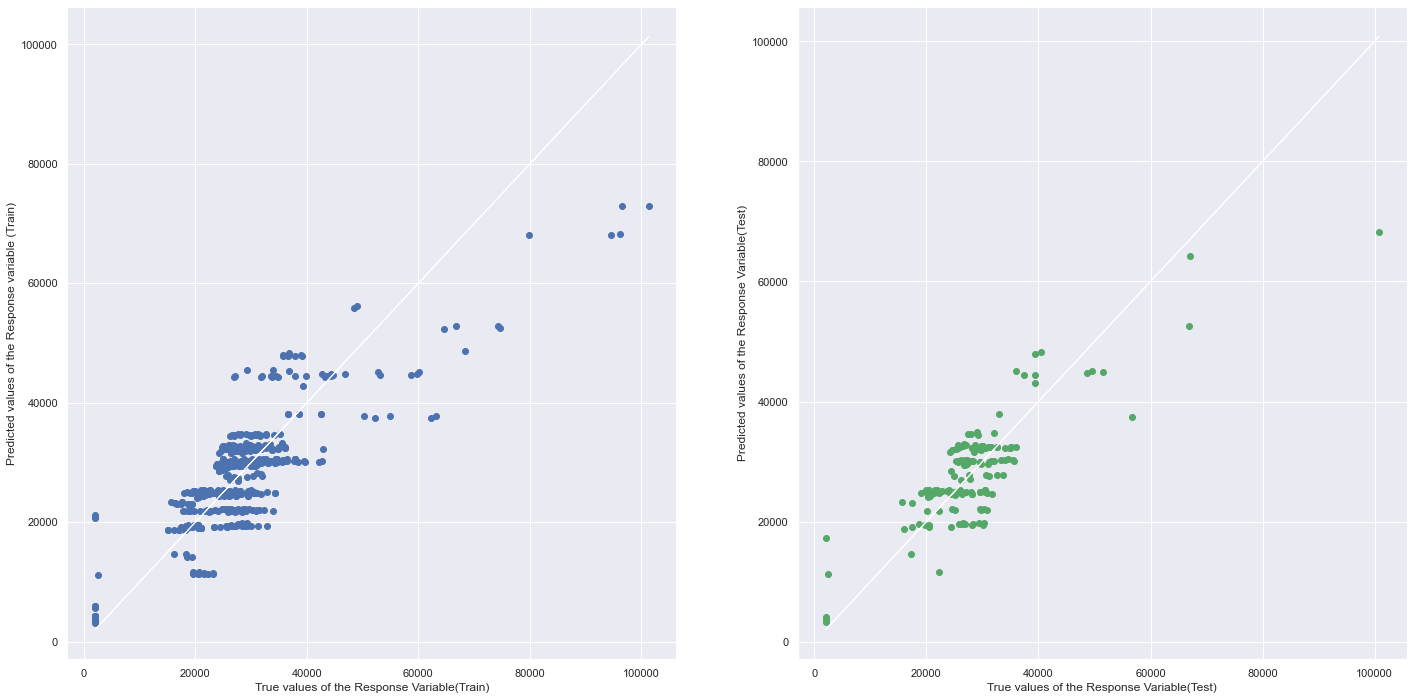

In [178]:
linreg = LinearRegression()  # create the linear regression object
linreg.fit(volks_x_train,volks_y_train)  # train the linear regression model
# Coefficients of the Linear Regression Line
print("Intercept of Regression \t: b = ",linreg.intercept_)
print("Coefficients of Regression \t: a =",linreg.coef_)
print(pd.DataFrame(list(zip(volks_x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to HP
volks_y_train_pred = linreg.predict(volks_x_train)
volks_y_test_pred = linreg.predict(volks_x_test)

# Check the Goodness of Fit on train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance(train) (R^2) \t:",linreg.score(volks_x_train,volks_y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(volks_y_train,volks_y_train_pred))
print("Explained Variance(test),prediction accuracy (R^2) \t:",100*linreg.score(volks_x_test,volks_y_test))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(volks_x_test,volks_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(volks_y_test, volks_y_test_pred))
print()

# Plot the Predictions vs the True Values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(volks_y_train,volks_y_train_pred,color = 'b')
axes[0].plot(volks_y_train,volks_y_train,'w-',linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable(Train)")
axes[0].set_ylabel("Predicted values of the Response variable (Train)")
axes[1].scatter(volks_y_test,volks_y_test_pred,color="g")
axes[1].plot(volks_y_test,volks_y_test,'w-',linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable(Test)")
axes[1].set_ylabel("Predicted values of the Response Variable(Test)")
plt.show()

Intercept of Regression 	: b =  [-1890796.31902597]
Coefficients of Regression 	: a = [[ 943.36454854  101.32736896 -451.24344606  475.70246888]]
    Predictors  Coefficients
0         Year    943.364549
1    Engine HP    101.327369
2  highway MPG   -451.243446
3     city mpg    475.702469

Goodness of Fit of Model 	Train Dataset
Explained Variance(train) (R^2) 	: 0.7191652565557027
Mean Squared Error (MSE) 	: 76374660.34432451
Explained Variance(test),prediction accuracy (R^2) 	: 78.7341516498248

Prediction accuracy 	Test Dataset
Explained Variance (R^2) 	: 0.7873415164982479
Mean Squared Error (MSE) 	: 53660187.0704981



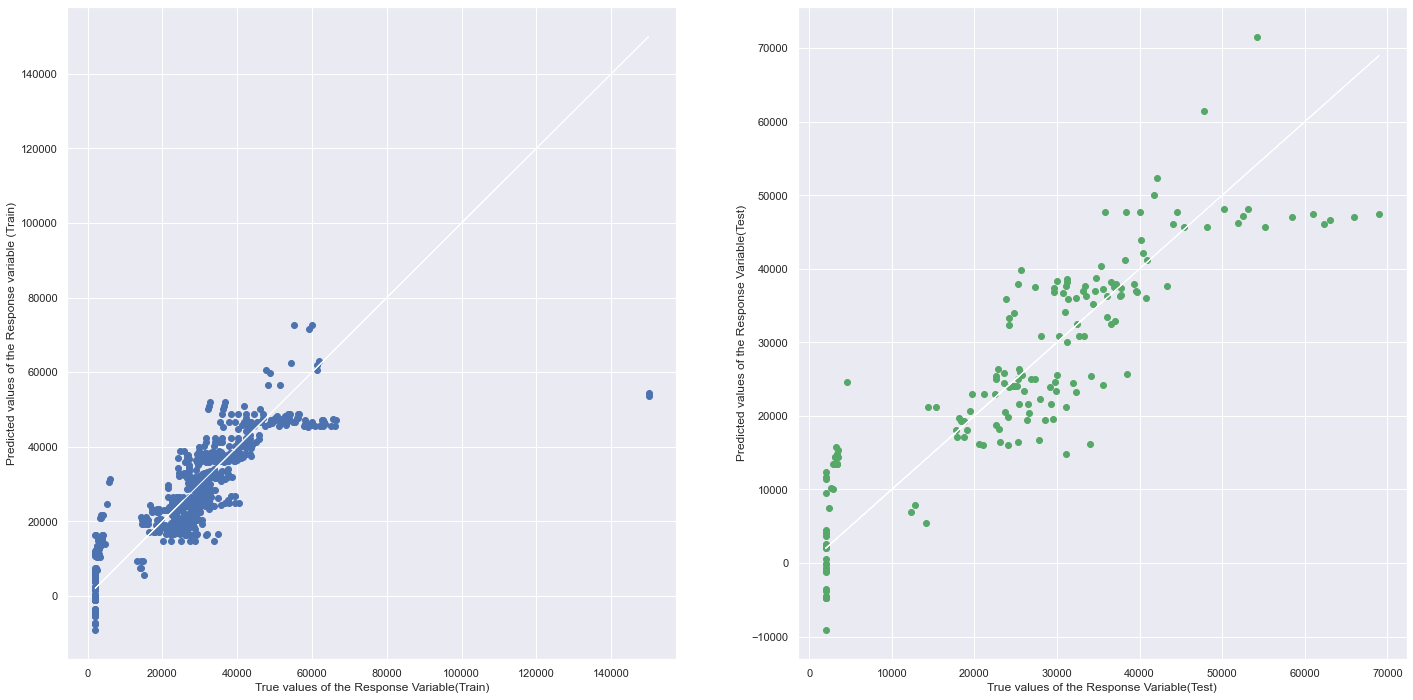

In [179]:
linreg = LinearRegression()  # create the linear regression object
linreg.fit(ford_x_train,ford_y_train)  # train the linear regression model
# Coefficients of the Linear Regression Line
print("Intercept of Regression \t: b = ",linreg.intercept_)
print("Coefficients of Regression \t: a =",linreg.coef_)
print(pd.DataFrame(list(zip(ford_x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to HP
ford_y_train_pred = linreg.predict(ford_x_train)
ford_y_test_pred = linreg.predict(ford_x_test)

# Check the Goodness of Fit on train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance(train) (R^2) \t:",linreg.score(ford_x_train,ford_y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(ford_y_train,ford_y_train_pred))
print("Explained Variance(test),prediction accuracy (R^2) \t:",100*linreg.score(ford_x_test,ford_y_test)) 
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(ford_x_test, ford_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(ford_y_test, ford_y_test_pred))
print()

# Plot the Predictions vs the True Values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(ford_y_train,ford_y_train_pred,color = 'b')
axes[0].plot(ford_y_train,ford_y_train,'w-',linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable(Train)")
axes[0].set_ylabel("Predicted values of the Response variable (Train)")
axes[1].scatter(ford_y_test,ford_y_test_pred,color="g")
axes[1].plot(ford_y_test,ford_y_test,'w-',linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable(Test)")
axes[1].set_ylabel("Predicted values of the Response Variable(Test)")
plt.show()

Intercept of Regression 	: b =  [-1764194.00085424]
Coefficients of Regression 	: a = [[878.19855318  89.83317421  77.45902083 114.76374639]]
    Predictors  Coefficients
0         Year    878.198553
1    Engine HP     89.833174
2  highway MPG     77.459021
3     city mpg    114.763746

Goodness of Fit of Model 	Train Dataset
Explained Variance(train) (R^2) 	: 0.7719206029992803
Mean Squared Error (MSE) 	: 38910064.42288031
Explained Variance(test),prediction accuracy (R^2) 	: 73.74211897266879

Prediction accuracy 	Test Dataset
Explained Variance (R^2) 	: 0.7374211897266879
Mean Squared Error (MSE) 	: 55254800.47682363



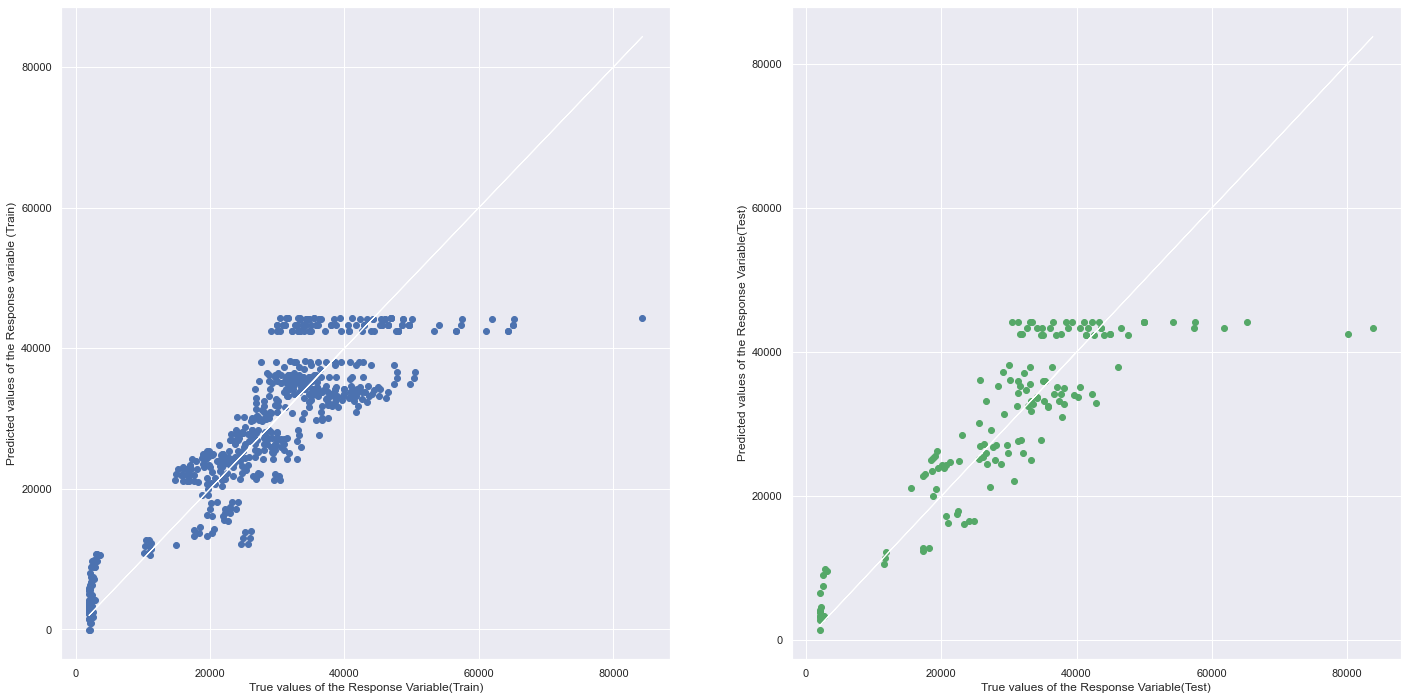

In [180]:
linreg = LinearRegression()  # create the linear regression object
linreg.fit(toyota_x_train,toyota_y_train)  # train the linear regression model
# Coefficients of the Linear Regression Line
print("Intercept of Regression \t: b = ",linreg.intercept_)
print("Coefficients of Regression \t: a =",linreg.coef_)
print(pd.DataFrame(list(zip(toyota_x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to HP
toyota_y_train_pred = linreg.predict(toyota_x_train)
toyota_y_test_pred = linreg.predict(toyota_x_test)

# Check the Goodness of Fit on train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance(train) (R^2) \t:",linreg.score(toyota_x_train,toyota_y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(toyota_y_train,toyota_y_train_pred))
print("Explained Variance(test),prediction accuracy (R^2) \t:",100*linreg.score(toyota_x_test,toyota_y_test)) 
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(toyota_x_test, toyota_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(toyota_y_test, toyota_y_test_pred))
print()

# Plot the Predictions vs the True Values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(toyota_y_train,toyota_y_train_pred,color = 'b')
axes[0].plot(toyota_y_train,toyota_y_train,'w-',linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable(Train)")
axes[0].set_ylabel("Predicted values of the Response variable (Train)")
axes[1].scatter(toyota_y_test,toyota_y_test_pred,color="g")
axes[1].plot(toyota_y_test,toyota_y_test,'w-',linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable(Test)")
axes[1].set_ylabel("Predicted values of the Response Variable(Test)")
plt.show()

Intercept of Regression 	: b =  [-806174.75732839]
Coefficients of Regression 	: a = [[ 385.34310107  184.55355498 -574.67231987 1514.9835739 ]]
    Predictors  Coefficients
0         Year    385.343101
1    Engine HP    184.553555
2  highway MPG   -574.672320
3     city mpg   1514.983574

Goodness of Fit of Model 	Train Dataset
Explained Variance(train) (R^2) 	: 0.8271231040588206
Mean Squared Error (MSE) 	: 46107887.698202
Explained Variance(test),prediction accuracy (R^2) 	: 78.98960800224084

Prediction accuracy 	Test Dataset
Explained Variance (R^2) 	: 0.7898960800224084
Mean Squared Error (MSE) 	: 81862705.08451834



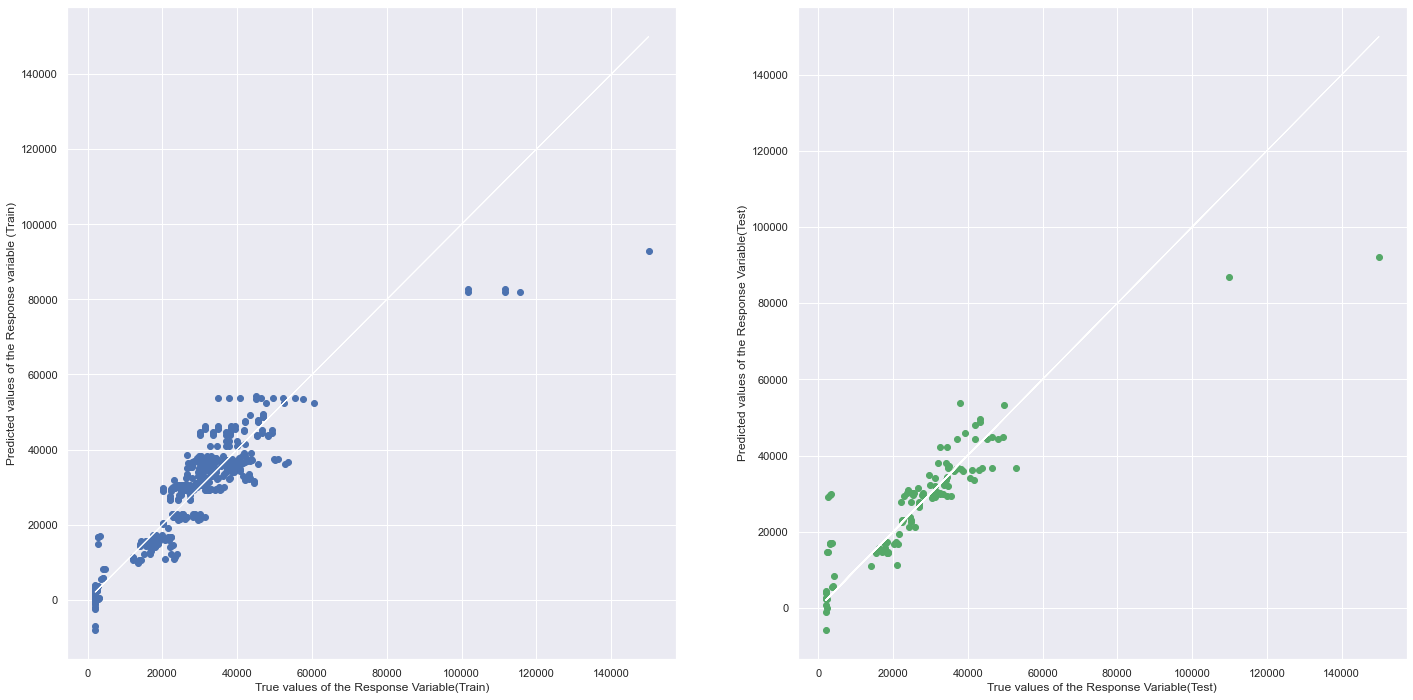

In [181]:
linreg = LinearRegression()  # create the linear regression object
linreg.fit(nissan_x_train,nissan_y_train)  # train the linear regression model
# Coefficients of the Linear Regression Line
print("Intercept of Regression \t: b = ",linreg.intercept_)
print("Coefficients of Regression \t: a =",linreg.coef_)
print(pd.DataFrame(list(zip(nissan_x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to HP
nissan_y_train_pred = linreg.predict(nissan_x_train)
nissan_y_test_pred = linreg.predict(nissan_x_test)

# Check the Goodness of Fit on train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance(train) (R^2) \t:",linreg.score(nissan_x_train,nissan_y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(nissan_y_train,nissan_y_train_pred))
print("Explained Variance(test),prediction accuracy (R^2) \t:",100*linreg.score(nissan_x_test,nissan_y_test)) 
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(nissan_x_test, nissan_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(nissan_y_test, nissan_y_test_pred))
print()

# Plot the Predictions vs the True Values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(nissan_y_train,nissan_y_train_pred,color = 'b')
axes[0].plot(nissan_y_train,nissan_y_train,'w-',linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable(Train)")
axes[0].set_ylabel("Predicted values of the Response variable (Train)")
axes[1].scatter(nissan_y_test,nissan_y_test_pred,color="g")
axes[1].plot(nissan_y_test,nissan_y_test,'w-',linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable(Test)")
axes[1].set_ylabel("Predicted values of the Response Variable(Test)")
plt.show()

In [182]:
#total = pd.concat([automatic,manual],axis = 0)
#license=pd.concat([msrp,total],axis = 1).reindex(msrp.index)
#f = plt.figure(figsize=(16, 8))
#sb.stripplot(x = 'MSRP', y = 'Transmission Type', data = license)

In [183]:
#from sklearn.tree import DecisionTreeClassifier
#tree = DecisionTreeClassifier(max_depth = 4)

In [184]:
#license=license.dropna()
#licenses = pd.DataFrame(license['Transmission Type'])
#Msrp = pd.DataFrame(license['MSRP'])


# Split the Dataset into random Train and Test
#licenses_train, licenses_test, Msrp_train, Msrp_test = train_test_split(licenses, Msrp, test_size = 0.2)

In [185]:
#tree.fit(Msrp_train, licenses_train)
#from sklearn.tree import plot_tree

#f = plt.figure(figsize=(24,24))
#plot_tree(tree, filled=True,  
 #         feature_names=Msrp_train.columns, 
 #         class_names=["manual","automatic"])

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
legnd = pd.DataFrame(pkmndata['Legendary'])   # Response
total = pd.DataFrame(pkmndata['Total'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(total, legnd, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])